In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#currency pairs: AUDUSD, EURUSD, GBPUSD, NZDUSD, USDJPY, USDCAD, USDSGD, USDCNH, XAUUSD
#crosses: AUDJPY, EURJPY, GBPJPY, EURAUD

In [2]:
#some useful codes
#df = pd.read_csv("C:/Users/STELLA/Desktop/Data Science/DS102_DS104/Data_2020/AUDUSD_1min.csv")
#df['50sma'] = df.Close.rolling(window = 50, min_periods = 1).mean()
#df['50ema'] = df.Close.ewm(span=50, adjust=False).mean()
#df['Date'] = pd.to_datetime(df['DateTime']).dt.date
#df['Time'] = pd.to_datetime(df['DateTime']).dt.time
# df.drop('DateTime', axis=1, inplace=True)

In [3]:
# We want to loop through the csv files in our directory to convert them to data frames, with a check at the end of each loop
# We can also use the loop to rename the time column and convert to datetime format 
# The weekend data are included so there are 500k+ rows, some of which are stale over the weekend andd volume equals zero
# We want to remove rows where volume =0, ie weekend data which is stale.
# We can then access each data frame by calling data_frames['file[:6]']
# This needs 20 mins to run 

import os

directory = "C:/Users/STELLA/Desktop/Data Science/DS102_DS104/Data_2020/"

data_frames = {}

for file in (os.listdir(directory)):
    df = pd.read_csv(directory+file)
    df.rename(columns = {'Gmt time':'Date'}, inplace = True)
    df['Date'] = pd.to_datetime(df.Date)
    df = df[df.Volume != 0]
    data_frames[file[:6]] = df 
    print(file[:6], "done")

    

AUDJPY done
AUDUSD done
EURAUD done
EURJPY done
EURUSD done
GBPJPY done
GBPUSD done
NZDUSD done
USDCNH done
USDJPY done
USDSGD done
XAUUSD done


In [4]:
len(data_frames)

12

We assign names to the dataframes by currency pair and the resample the 1 minute data to 5 minute data points. This reduces the number of data points from abt 370k rows to 100k rows per pair


In [5]:
# assigning name to df and checking
eur_df = data_frames["EURUSD"]
eur_df.head(5)

,Date,Open,High,Low,Close,Volume
0,2020-02-01 00:00:00,1.12188,1.12189,1.12178,1.12182,68.93
1,2020-02-01 00:01:00,1.12182,1.12182,1.12180,1.12182,16.04
2,2020-02-01 00:02:00,1.12182,1.12183,1.12181,1.12183,7.16
3,2020-02-01 00:03:00,1.12181,1.12187,1.12181,1.12187,15.71
4,2020-02-01 00:04:00,1.12187,1.12190,1.12187,1.12189,23.01


In [6]:
aud_df = data_frames["AUDUSD"]
gbp_df = data_frames["GBPUSD"]
jpy_df = data_frames["USDJPY"]
nzd_df = data_frames["NZDUSD"]
sgd_df = data_frames["USDSGD"]
cnh_df = data_frames["USDCNH"]
audjpy_df = data_frames["AUDJPY"]
eurjpy_df = data_frames["EURJPY"]
gbpjpy_df = data_frames["GBPJPY"]
euraud_df = data_frames["EURAUD"]
xau_df = data_frames["XAUUSD"]

In [7]:
#Resample all pairs to 5 minute intervals
#This reduces the number of rows from 370k to less than 100k rows approx per pair. Helps with the ram! 

aud_5min_df = aud_df.set_index('Date').resample('5min').pad()
eur_5min_df = eur_df.set_index('Date').resample('5min').pad()
gbp_5min_df = gbp_df.set_index('Date').resample('5min').pad()
jpy_5min_df = jpy_df.set_index('Date').resample('5min').pad()
nzd_5min_df = nzd_df.set_index('Date').resample('5min').pad()
sgd_5min_df = sgd_df.set_index('Date').resample('5min').pad()
cnh_5min_df = cnh_df.set_index('Date').resample('5min').pad()
xau_5min_df = xau_df.set_index('Date').resample('5min').pad()
audjpy_5min_df = audjpy_df.set_index('Date').resample('5min').pad()
eurjpy_5min_df = eurjpy_df.set_index('Date').resample('5min').pad()
gbpjpy_5min_df = gbpjpy_df.set_index('Date').resample('5min').pad()
euraud_5min_df = euraud_df.set_index('Date').resample('5min').pad()

# Calculate SMA20 SMA50 and SMA200 for the data sets

Add these variables as new columns into each of the dataset

In [9]:
# Add new columns SMA20, SMA50  ie simple moving average
# We will use the close data of the time interval 
aud_5min_df['SMA20'] = aud_5min_df.Close.rolling(window = 20).mean()
aud_5min_df['SMA50'] = aud_5min_df.Close.rolling(window = 50).mean()
aud_5min_df['SMA200'] = aud_5min_df.Close.rolling(window = 200).mean()

eur_5min_df['SMA20'] = eur_5min_df.Close.rolling(window = 20).mean()
eur_5min_df['SMA50'] = eur_5min_df.Close.rolling(window = 50).mean()
eur_5min_df['SMA200'] = eur_5min_df.Close.rolling(window = 200).mean()

gbp_5min_df['SMA20'] = gbp_5min_df.Close.rolling(window = 20).mean()
gbp_5min_df['SMA50'] = gbp_5min_df.Close.rolling(window = 50).mean()
gbp_5min_df['SMA200'] = gbp_5min_df.Close.rolling(window = 200).mean()

jpy_5min_df['SMA20'] = jpy_5min_df.Close.rolling(window = 20).mean()
jpy_5min_df['SMA50'] = jpy_5min_df.Close.rolling(window = 50).mean()
jpy_5min_df['SMA200'] = jpy_5min_df.Close.rolling(window = 200).mean()

nzd_5min_df['SMA20'] = nzd_5min_df.Close.rolling(window = 20).mean()
nzd_5min_df['SMA50'] = nzd_5min_df.Close.rolling(window = 50).mean()
nzd_5min_df['SMA200'] = nzd_5min_df.Close.rolling(window = 200).mean()

sgd_5min_df['SMA20'] = sgd_5min_df.Close.rolling(window = 20).mean()
sgd_5min_df['SMA50'] = sgd_5min_df.Close.rolling(window = 50).mean()
sgd_5min_df['SMA200'] = sgd_5min_df.Close.rolling(window = 200).mean()

cnh_5min_df['SMA20'] = cnh_5min_df.Close.rolling(window = 20).mean()
cnh_5min_df['SMA50'] = cnh_5min_df.Close.rolling(window = 50).mean()
cnh_5min_df['SMA200'] = cnh_5min_df.Close.rolling(window = 200).mean()

xau_5min_df['SMA20'] = xau_5min_df.Close.rolling(window = 20).mean()
xau_5min_df['SMA50'] = xau_5min_df.Close.rolling(window = 50).mean()
xau_5min_df['SMA200'] = xau_5min_df.Close.rolling(window = 200).mean()

audjpy_5min_df['SMA20'] = audjpy_5min_df.Close.rolling(window = 20).mean()
audjpy_5min_df['SMA50'] = audjpy_5min_df.Close.rolling(window = 50).mean()
audjpy_5min_df['SMA200'] = audjpy_5min_df.Close.rolling(window = 200).mean()

eurjpy_5min_df['SMA20'] = eurjpy_5min_df.Close.rolling(window = 20).mean()
eurjpy_5min_df['SMA50'] = eurjpy_5min_df.Close.rolling(window = 50).mean()
eurjpy_5min_df['SMA200'] = eurjpy_5min_df.Close.rolling(window = 200).mean()

gbpjpy_5min_df['SMA20'] = gbpjpy_5min_df.Close.rolling(window = 20).mean()
gbpjpy_5min_df['SMA50'] = gbpjpy_5min_df.Close.rolling(window = 50).mean()
gbpjpy_5min_df['SMA200'] = gbpjpy_5min_df.Close.rolling(window = 200).mean()

euraud_5min_df['SMA20'] = euraud_5min_df.Close.rolling(window = 20).mean()
euraud_5min_df['SMA50'] = euraud_5min_df.Close.rolling(window = 50).mean()
euraud_5min_df['SMA200'] = euraud_5min_df.Close.rolling(window = 200).mean()


# Using SMA, we formulate a trading strategy where the model generates a "BUY" signal if SMA20 > SMA50 (SMA20 crosses above SMA50) and a "SELL" signal if SMA20< SMA50 (SMA20 cuts down below SMA50)

In [10]:
# Trading Strategy AUDUSD 
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
aud_5min_df['Signal'] = 0.0
aud_5min_df['Signal'] = np.where(aud_5min_df['SMA20'] > aud_5min_df['SMA50'], 1.0, 0.0)
aud_5min_df['Position'] = aud_5min_df['Signal'].diff()

In [11]:
# Can see where the buy and sell signals are in a dataframe based on SMA20 > SMA50 
aud_5min_df[aud_5min_df['Position']==1]
aud_5min_df[aud_5min_df['Position']==-1]

,Open,High,Low,Close,Volume,SMA20,SMA50,SMA200,Signal,Position
Date,,,,,,,,,,
2020-01-04 05:55:00,0.61127,0.61182,0.61127,0.61176,158.30,0.612469,0.612476,NaN,0.0,-1.0
2020-01-04 12:10:00,0.60609,0.60609,0.60566,0.60570,132.04,0.606688,0.606697,NaN,0.0,-1.0
2020-01-04 17:35:00,0.60655,0.60657,0.60645,0.60647,122.12,0.608631,0.608666,0.609018,0.0,-1.0
2020-01-05 04:00:00,0.64651,0.64654,0.64645,0.64654,20.70,0.646320,0.646355,0.617277,0.0,-1.0
2020-01-05 10:15:00,0.64488,0.64497,0.64481,0.64481,31.85,0.645015,0.645024,0.631393,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:55:00,0.76752,0.76757,0.76748,0.76756,28.49,0.767972,0.767999,0.766433,0.0,-1.0
2020-12-31 03:55:00,0.77000,0.77008,0.76996,0.76996,31.78,0.769746,0.769786,0.768174,0.0,-1.0
2020-12-31 09:45:00,0.76976,0.76979,0.76972,0.76977,101.37,0.770419,0.770429,0.769300,0.0,-1.0


In [12]:
# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of 1500 rows 
aud_5min_df1 = aud_5min_df.reset_index().iloc[50:1550, :]
aud_5min_df1

,Date,Open,High,Low,Close,Volume,SMA20,SMA50,SMA200,Signal,Position
50,2020-01-04 02:10:00,0.61152,0.61194,0.61152,0.61191,78.54,0.612684,0.629753,NaN,0.0,0.0
51,2020-01-04 02:15:00,0.61223,0.61280,0.61222,0.61269,206.80,0.612655,0.629051,NaN,0.0,0.0
52,2020-01-04 02:20:00,0.61261,0.61293,0.61251,0.61293,134.91,0.612627,0.628347,NaN,0.0,0.0
53,2020-01-04 02:25:00,0.61244,0.61263,0.61242,0.61251,99.85,0.612587,0.627635,NaN,0.0,0.0
54,2020-01-04 02:30:00,0.61237,0.61242,0.61220,0.61241,93.54,0.612518,0.626918,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1545,2020-01-09 06:45:00,0.74023,0.74025,0.74002,0.74021,140.99,0.740250,0.740375,0.711032,0.0,0.0
1546,2020-01-09 06:50:00,0.73978,0.73991,0.73978,0.73990,90.53,0.740231,0.740362,0.711276,0.0,0.0
1547,2020-01-09 06:55:00,0.73990,0.73990,0.73944,0.73954,162.15,0.740187,0.740334,0.711518,0.0,0.0
1548,2020-01-09 07:00:00,0.73991,0.73991,0.73956,0.73968,215.04,0.740147,0.740321,0.711761,0.0,0.0


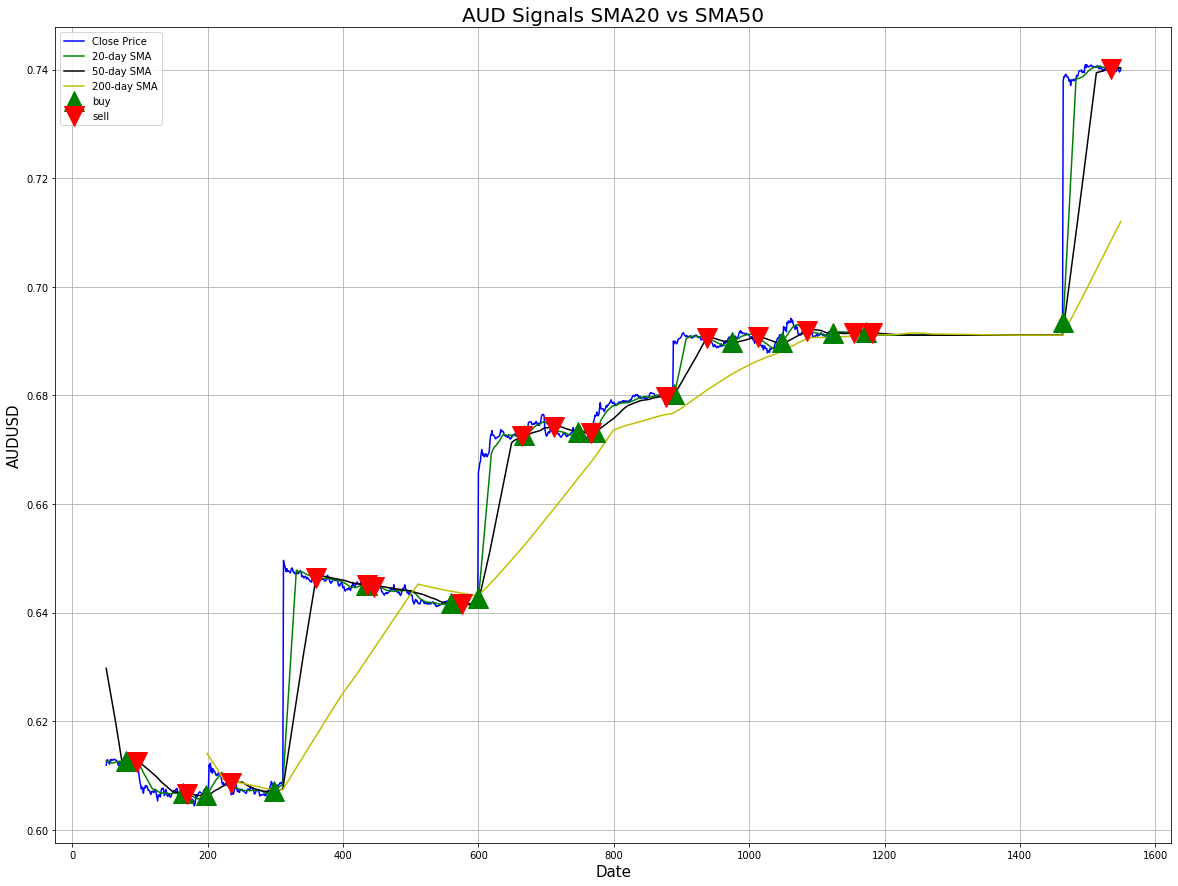

In [13]:
plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50
aud_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
aud_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
aud_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
aud_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')

# plot ‘buy’ signals in green arrows
plt.plot(aud_5min_df1[aud_5min_df1['Position'] == 1].index, 
         aud_5min_df1['SMA20'][aud_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals in red arrows
plt.plot(aud_5min_df1[aud_5min_df1['Position'] == -1].index, 
         aud_5min_df1['SMA20'][aud_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('AUDUSD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('AUD Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


In [14]:
# Trading Strategy EURUSD
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
eur_5min_df['Signal'] = 0.0
eur_5min_df['Signal'] = np.where(eur_5min_df['SMA20'] > eur_5min_df['SMA50'], 1.0, 0.0)
eur_5min_df['Position'] = eur_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1500 
eur_5min_df1 = eur_5min_df.reset_index().iloc[50:1550 :]


# Can see where the buy and sell signals are in a dataframe
eur_5min_df[eur_5min_df['Position']==1]
eur_5min_df[eur_5min_df['Position']==-1]

,Open,High,Low,Close,Volume,SMA20,SMA50,SMA200,Signal,Position
Date,,,,,,,,,,
2020-01-04 06:25:00,1.10069,1.10074,1.10017,1.10028,266.31,1.102046,1.102093,NaN,0.0,-1.0
2020-01-04 12:25:00,1.09289,1.09306,1.09271,1.09271,396.11,1.093769,1.093778,NaN,0.0,-1.0
2020-01-04 15:50:00,1.09330,1.09331,1.09308,1.09322,114.52,1.092920,1.092939,1.097868,0.0,-1.0
2020-01-04 17:20:00,1.09228,1.09231,1.09213,1.09217,121.44,1.092780,1.092842,1.096816,0.0,-1.0
2020-01-04 23:05:00,1.09504,1.09514,1.09496,1.09499,41.14,1.095349,1.095363,1.094184,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-30 06:30:00,1.22797,1.22803,1.22786,1.22786,69.45,1.228600,1.228608,1.226275,0.0,-1.0
2020-12-30 17:30:00,1.22818,1.22834,1.22817,1.22831,40.27,1.228603,1.228659,1.228050,0.0,-1.0
2020-12-31 03:10:00,1.22910,1.22916,1.22908,1.22916,49.99,1.230140,1.230152,1.229041,0.0,-1.0


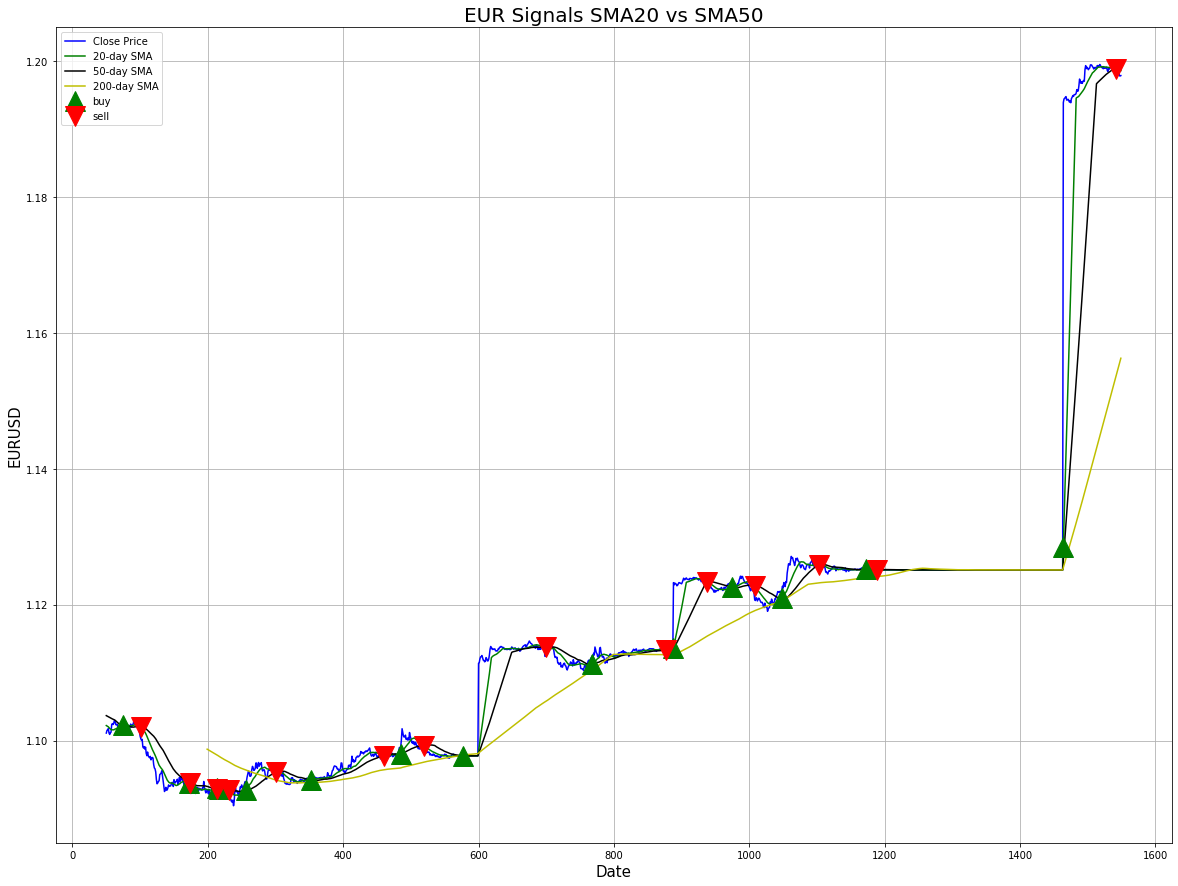

In [15]:
plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50 
eur_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
eur_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
eur_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
eur_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')
                          
# plot ‘buy’ signals
plt.plot(eur_5min_df1[eur_5min_df1['Position'] == 1].index, 
         eur_5min_df1['SMA20'][eur_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(eur_5min_df1[eur_5min_df1['Position'] == -1].index, 
         eur_5min_df1['SMA20'][eur_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('EURUSD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('EUR Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


In [16]:
# Trading Strategy GBPUSD
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
gbp_5min_df['Signal'] = 0.0
gbp_5min_df['Signal'] = np.where(gbp_5min_df['SMA20'] > gbp_5min_df['SMA50'], 1.0, 0.0)
gbp_5min_df['Position'] = gbp_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1500 
gbp_5min_df1 = gbp_5min_df.reset_index().iloc[50:1550 :]

# Can see where the buy and sell signals are in a dataframe
gbp_5min_df[gbp_5min_df['Position']==1]
gbp_5min_df[gbp_5min_df['Position']==-1]

,Open,High,Low,Close,Volume,SMA20,SMA50,SMA200,Signal,Position
Date,,,,,,,,,,
2020-01-04 06:00:00,1.23828,1.23833,1.23784,1.23784,212.92,1.238051,1.238053,NaN,0.0,-1.0
2020-01-04 16:25:00,1.23935,1.23964,1.23935,1.23951,486.21,1.240004,1.240167,1.238709,0.0,-1.0
2020-01-04 21:55:00,1.23891,1.23891,1.23880,1.23881,20.75,1.238777,1.238793,1.238228,0.0,-1.0
2020-01-04 23:40:00,1.23803,1.23814,1.23803,1.23808,160.99,1.238942,1.238949,1.238446,0.0,-1.0
2020-01-05 06:45:00,1.25541,1.25541,1.25477,1.25509,399.61,1.256169,1.256171,1.246220,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-30 06:50:00,1.35370,1.35374,1.35350,1.35350,201.61,1.354041,1.354125,1.351217,0.0,-1.0
2020-12-30 14:15:00,1.36014,1.36021,1.35942,1.35949,291.25,1.359724,1.359782,1.354782,0.0,-1.0
2020-12-31 03:15:00,1.36141,1.36154,1.36124,1.36145,96.01,1.363457,1.363460,1.361258,0.0,-1.0


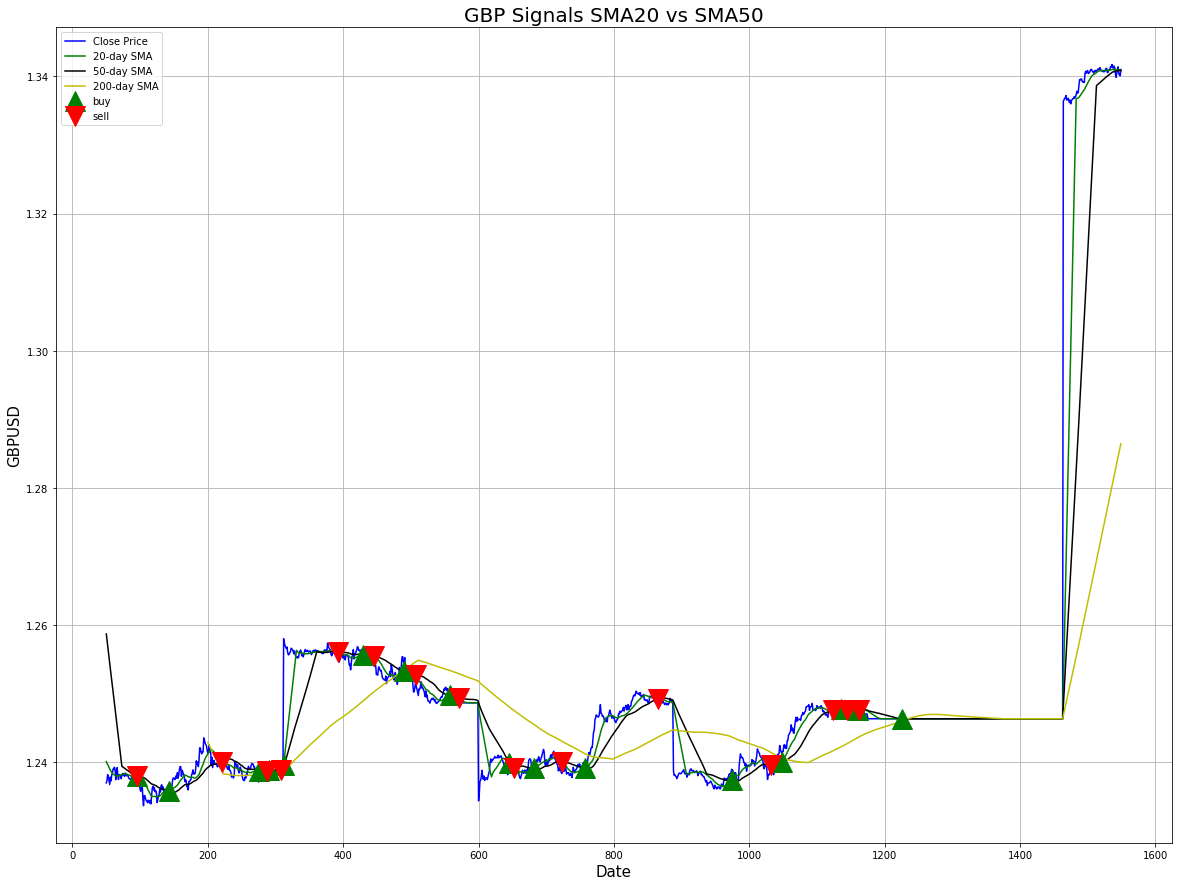

In [17]:
plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50
gbp_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
gbp_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
gbp_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
gbp_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')
                          
# plot ‘buy’ signals
plt.plot(gbp_5min_df1[gbp_5min_df1['Position'] == 1].index, 
         gbp_5min_df1['SMA20'][gbp_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(gbp_5min_df1[gbp_5min_df1['Position'] == -1].index, 
         gbp_5min_df1['SMA20'][gbp_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('GBPUSD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('GBP Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


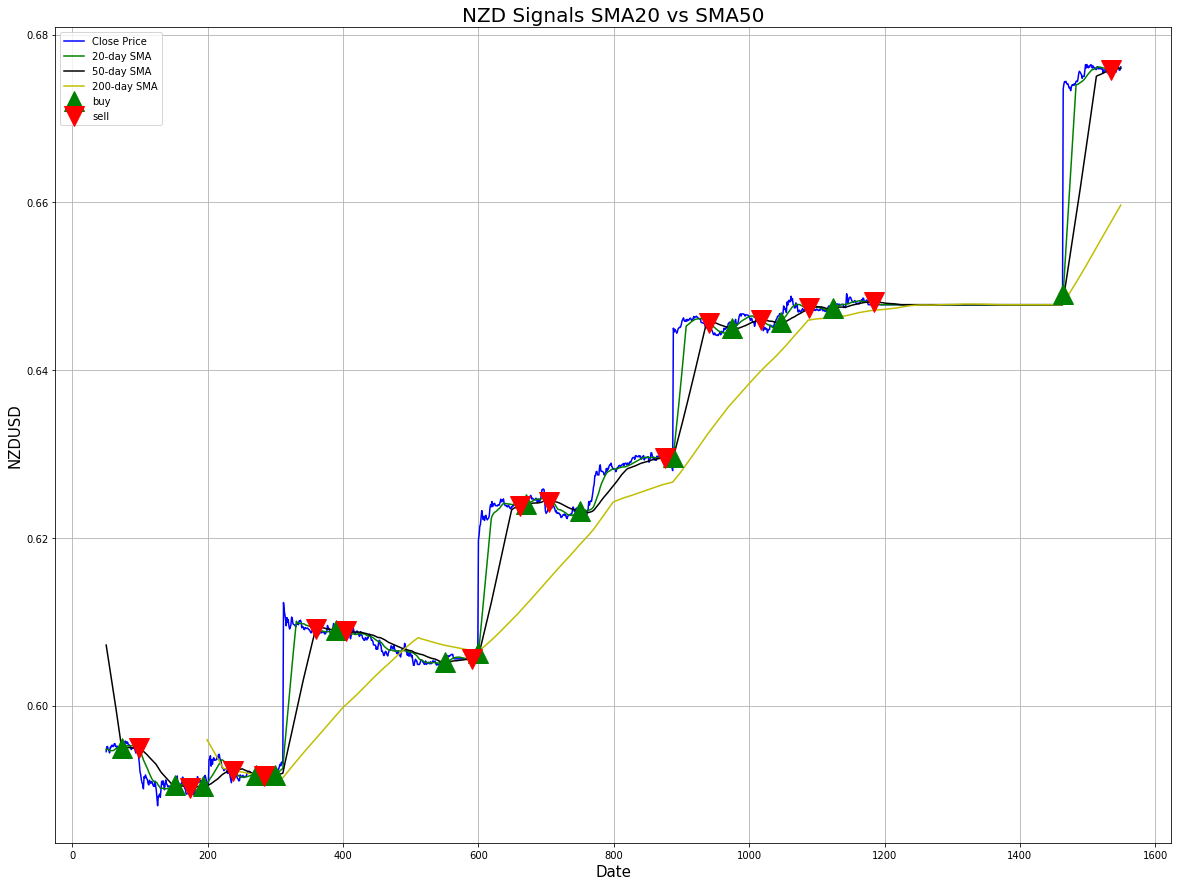

In [18]:
# Trading Strategy NZDUSD
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
nzd_5min_df['Signal'] = 0.0
nzd_5min_df['Signal'] = np.where(nzd_5min_df['SMA20'] > nzd_5min_df['SMA50'], 1.0, 0.0)
nzd_5min_df['Position'] = nzd_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1500 
nzd_5min_df1 = nzd_5min_df.reset_index().iloc[50:1550, :]

# Can see where the buy and sell signals are in a dataframe
nzd_5min_df[nzd_5min_df['Position']==1]
nzd_5min_df[nzd_5min_df['Position']==-1]


plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50 
nzd_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
nzd_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
nzd_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
nzd_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')
                          
# plot ‘buy’ signals
plt.plot(nzd_5min_df1[nzd_5min_df1['Position'] == 1].index, 
         nzd_5min_df1['SMA20'][nzd_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(nzd_5min_df1[nzd_5min_df1['Position'] == -1].index, 
         nzd_5min_df1['SMA20'][nzd_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('NZDUSD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('NZD Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()



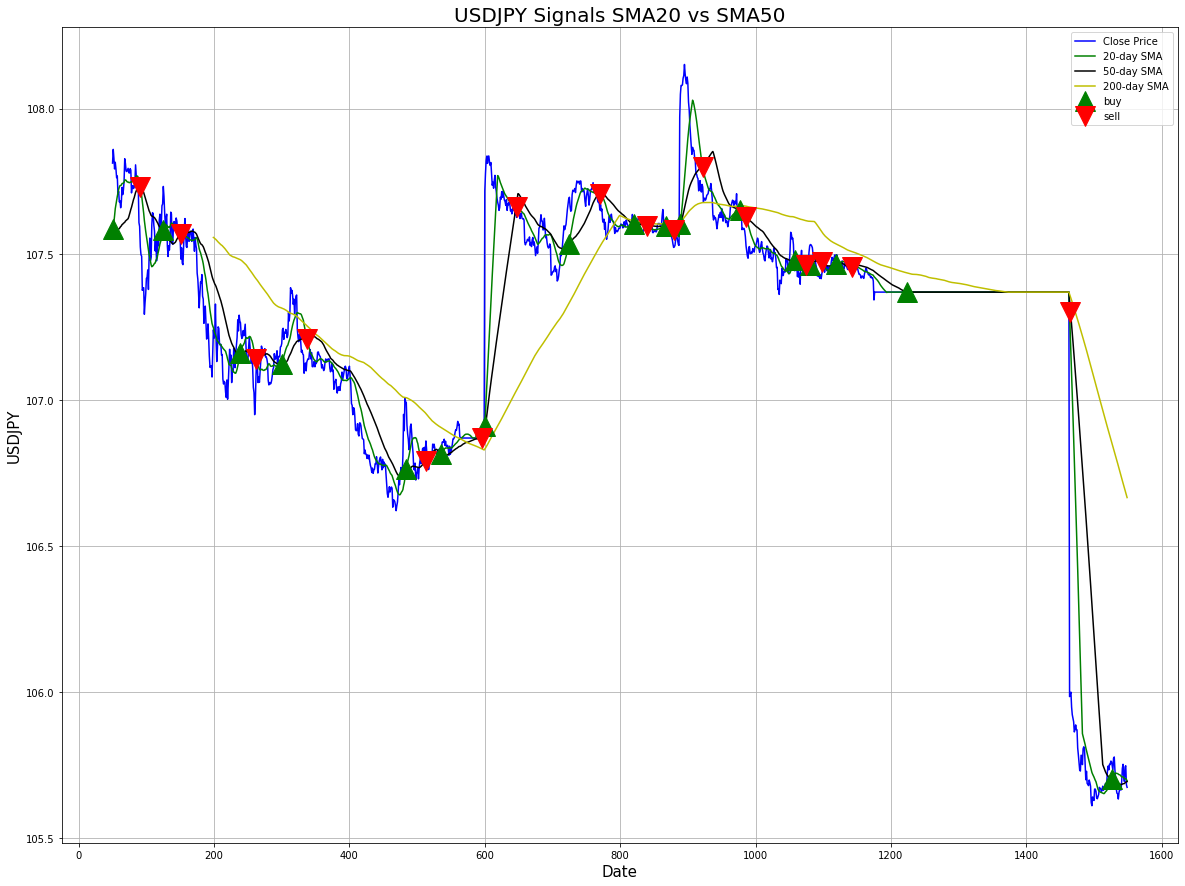

In [19]:
# Trading Strategy USDJPY
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
jpy_5min_df['Signal'] = 0.0
jpy_5min_df['Signal'] = np.where(jpy_5min_df['SMA20'] > jpy_5min_df['SMA50'], 1.0, 0.0)
jpy_5min_df['Position'] = jpy_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1500 
jpy_5min_df1 = jpy_5min_df.reset_index().iloc[50:1550 :]

# Can see where the buy and sell signals are in a dataframe
jpy_5min_df[jpy_5min_df['Position']==1]
jpy_5min_df[jpy_5min_df['Position']==-1]

plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50
jpy_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
jpy_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
jpy_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
jpy_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')
                          
# plot ‘buy’ signals
plt.plot(jpy_5min_df1[jpy_5min_df1['Position'] == 1].index, 
         jpy_5min_df1['SMA20'][jpy_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(jpy_5min_df1[jpy_5min_df1['Position'] == -1].index, 
         jpy_5min_df1['SMA20'][jpy_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('USDJPY', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('USDJPY Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


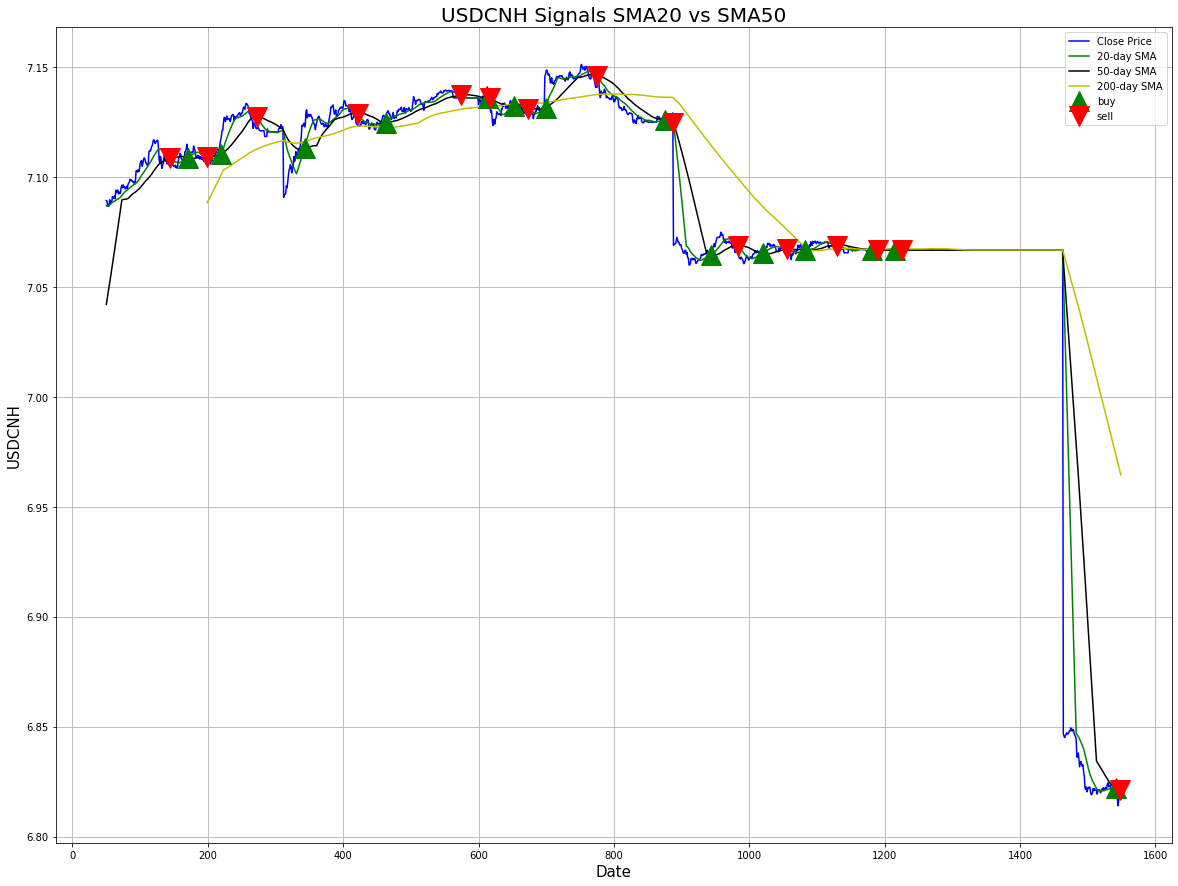

In [20]:
# Trading Strategy USDCNH
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
cnh_5min_df['Signal'] = 0.0
cnh_5min_df['Signal'] = np.where(cnh_5min_df['SMA20'] > cnh_5min_df['SMA50'], 1.0, 0.0)
cnh_5min_df['Position'] = cnh_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1000 
cnh_5min_df1 = cnh_5min_df.reset_index().iloc[50:1550 :]

# Can see where the buy and sell signals are in a dataframe
cnh_5min_df[cnh_5min_df['Position']==1]
cnh_5min_df[cnh_5min_df['Position']==-1]


plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50
cnh_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
cnh_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
cnh_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
cnh_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')
                          
# plot ‘buy’ signals
plt.plot(cnh_5min_df1[cnh_5min_df1['Position'] == 1].index, 
         cnh_5min_df1['SMA20'][cnh_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(cnh_5min_df1[cnh_5min_df1['Position'] == -1].index, 
         cnh_5min_df1['SMA20'][cnh_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('USDCNH', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('USDCNH Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


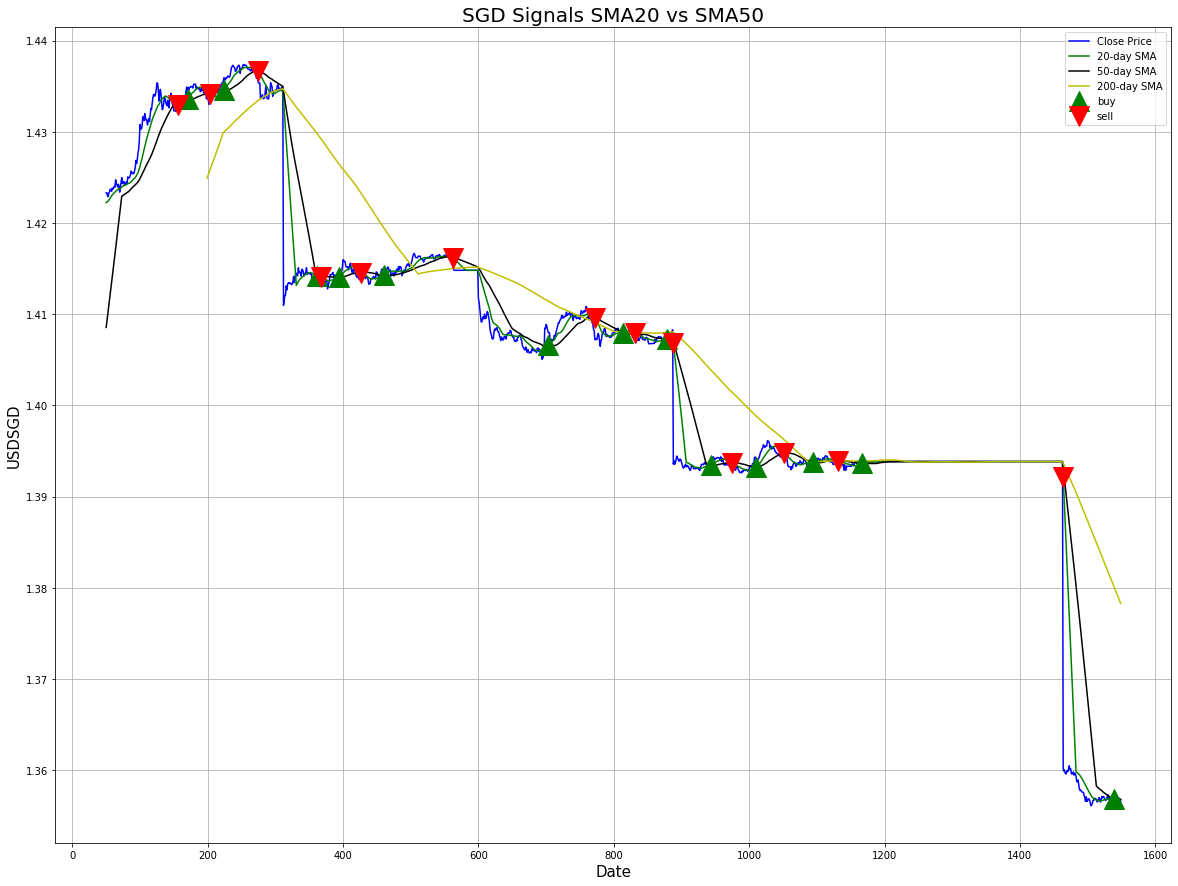

In [21]:
# Trading Strategy USDSGD
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
sgd_5min_df['Signal'] = 0.0
sgd_5min_df['Signal'] = np.where(sgd_5min_df['SMA20'] > sgd_5min_df['SMA50'], 1.0, 0.0)
sgd_5min_df['Position'] = sgd_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1000 
sgd_5min_df1 = sgd_5min_df.reset_index().iloc[50:1550 :]

# Can see where the buy and sell signals are in a dataframe
sgd_5min_df[sgd_5min_df['Position']==1]
sgd_5min_df[sgd_5min_df['Position']==-1]

plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50 
sgd_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
sgd_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
sgd_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
sgd_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')
                          
# plot ‘buy’ signals
plt.plot(sgd_5min_df1[sgd_5min_df1['Position'] == 1].index, 
         sgd_5min_df1['SMA20'][sgd_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(sgd_5min_df1[sgd_5min_df1['Position'] == -1].index, 
         sgd_5min_df1['SMA20'][sgd_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('USDSGD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SGD Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


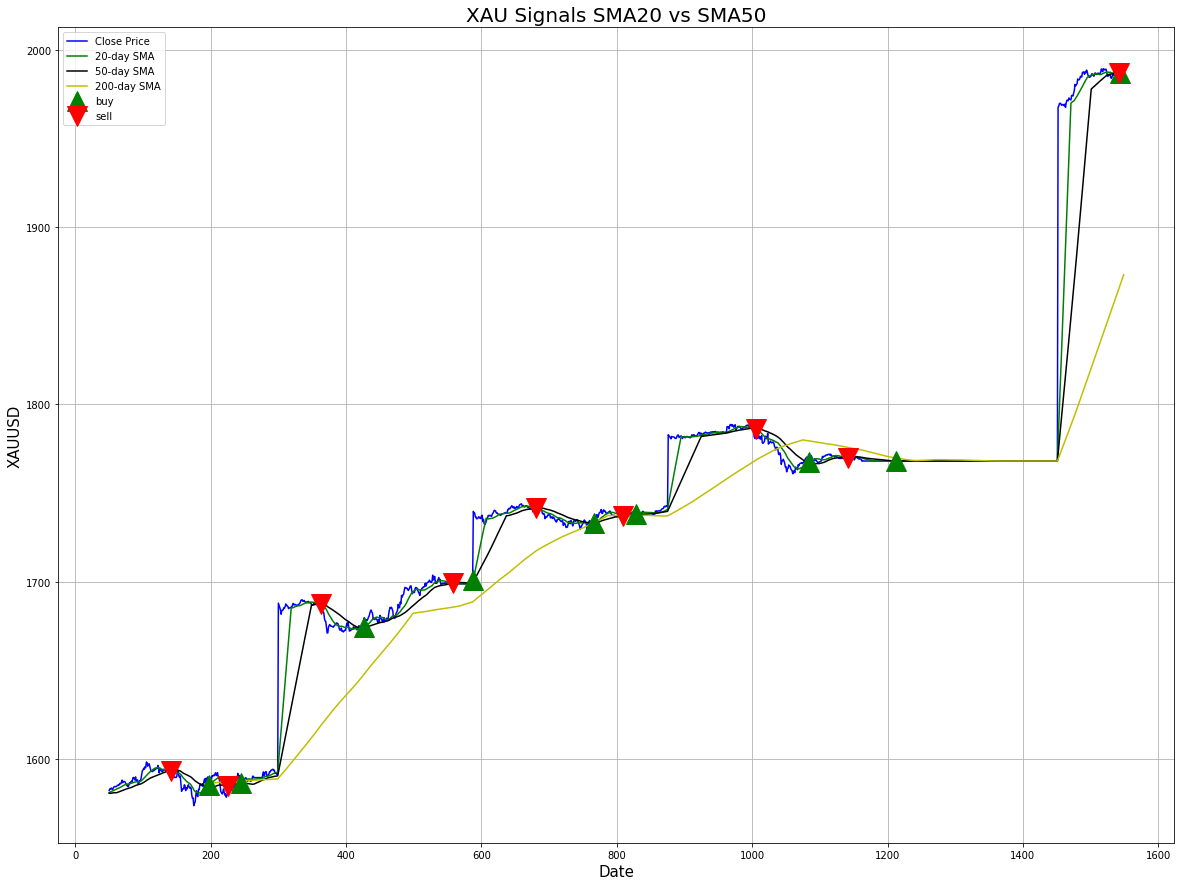

In [22]:
# Trading Strategy XAUUSD
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
xau_5min_df['Signal'] = 0.0
xau_5min_df['Signal'] = np.where(xau_5min_df['SMA20'] > xau_5min_df['SMA50'], 1.0, 0.0)
xau_5min_df['Position'] = xau_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1000 
xau_5min_df1 = xau_5min_df.reset_index().iloc[50:1550 :]

# Can see where the buy and sell signals are in a dataframe
xau_5min_df[xau_5min_df['Position']==1]
xau_5min_df[xau_5min_df['Position']==-1]


plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50
xau_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
xau_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
xau_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
xau_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')
                          
# plot ‘buy’ signals
plt.plot(xau_5min_df1[xau_5min_df1['Position'] == 1].index, 
         xau_5min_df1['SMA20'][xau_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(xau_5min_df1[xau_5min_df1['Position'] == -1].index, 
         xau_5min_df1['SMA20'][xau_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('XAUUSD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('XAU Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


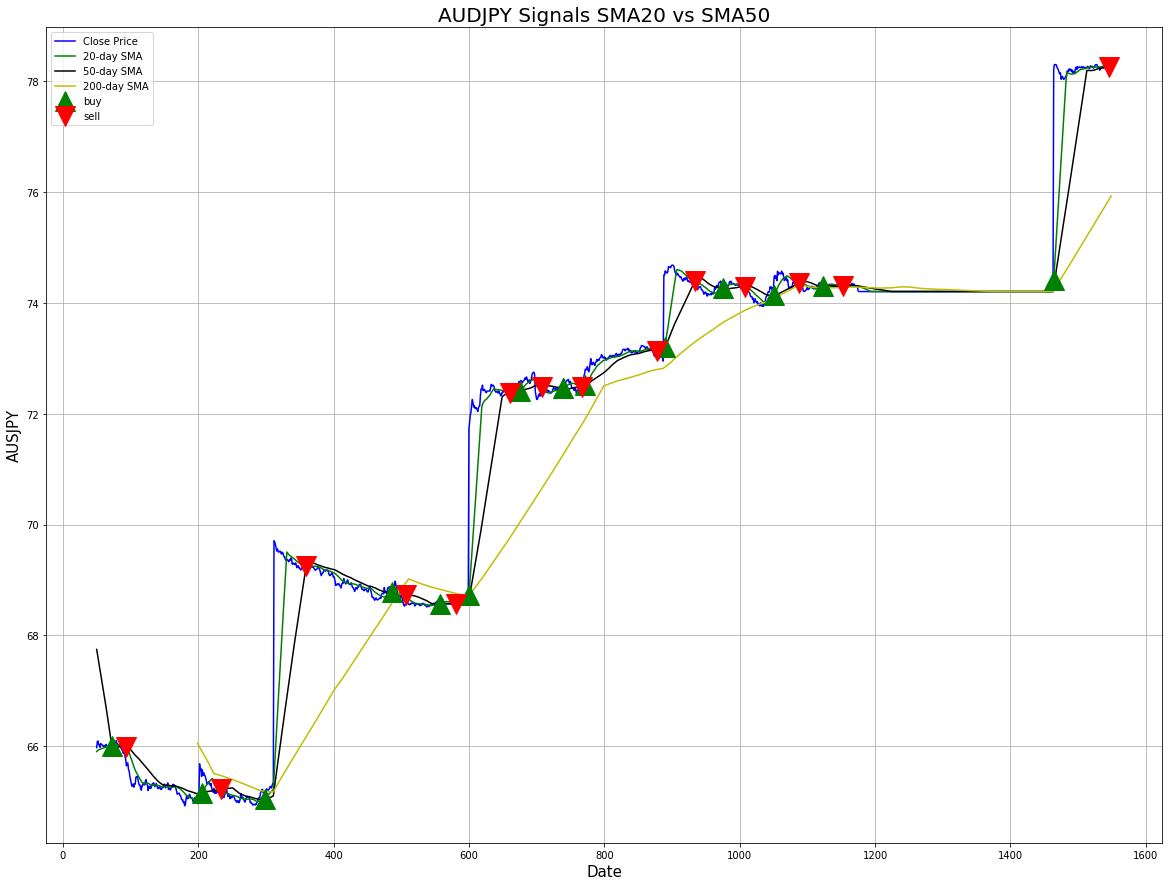

In [23]:
# Trading Strategy AUDJPY
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
audjpy_5min_df['Signal'] = 0.0
audjpy_5min_df['Signal'] = np.where(audjpy_5min_df['SMA20'] > audjpy_5min_df['SMA50'], 1.0, 0.0)
audjpy_5min_df['Position'] = audjpy_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1000 
audjpy_5min_df1 = audjpy_5min_df.reset_index().iloc[50:1550 :]


# Can see where the buy and sell signals are in a dataframe
audjpy_5min_df[audjpy_5min_df['Position']==1]
audjpy_5min_df[audjpy_5min_df['Position']==-1]


plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50
audjpy_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
audjpy_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
audjpy_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
audjpy_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')
                          
# plot ‘buy’ signals
plt.plot(audjpy_5min_df1[audjpy_5min_df1['Position'] == 1].index, 
         audjpy_5min_df1['SMA20'][audjpy_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(audjpy_5min_df1[audjpy_5min_df1['Position'] == -1].index, 
         audjpy_5min_df1['SMA20'][audjpy_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('AUSJPY', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('AUDJPY Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()



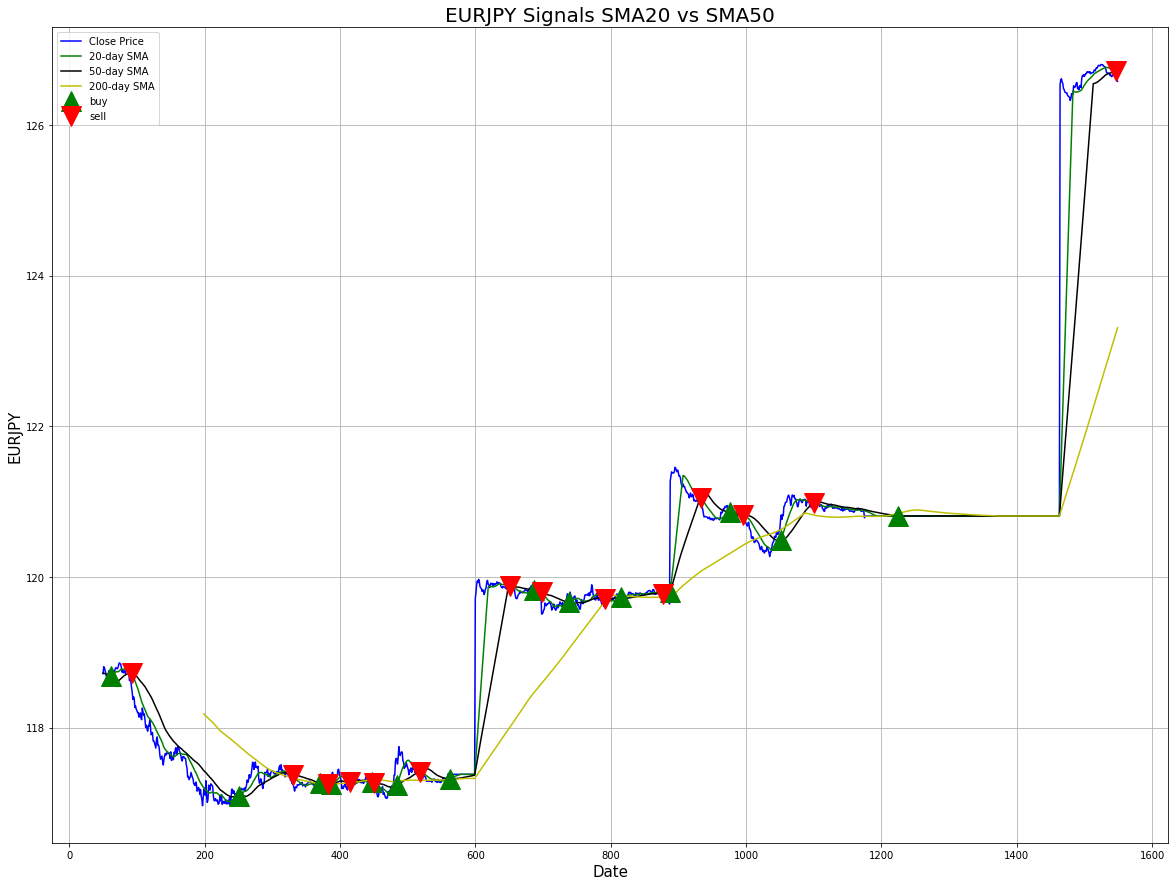

In [40]:
# Trading Strategy EURJPY
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
eurjpy_5min_df['Signal'] = 0.0
eurjpy_5min_df['Signal'] = np.where(eurjpy_5min_df['SMA20'] > eurjpy_5min_df['SMA50'], 1.0, 0.0)
eurjpy_5min_df['Position'] = eurjpy_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1000 
eurjpy_5min_df1 = eurjpy_5min_df.reset_index().iloc[50:1550 :]


# Can see where the buy and sell signals are in a dataframe
eurjpy_5min_df[eurjpy_5min_df['Position']==1]
eurjpy_5min_df[eurjpy_5min_df['Position']==-1]


plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50
eurjpy_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
eurjpy_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
eurjpy_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
eurjpy_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')
                          
# plot ‘buy’ signals
plt.plot(eurjpy_5min_df1[eurjpy_5min_df1['Position'] == 1].index, 
         eurjpy_5min_df1['SMA20'][eurjpy_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(eurjpy_5min_df1[eurjpy_5min_df1['Position'] == -1].index, 
         eurjpy_5min_df1['SMA20'][eurjpy_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('EURJPY', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('EURJPY Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()



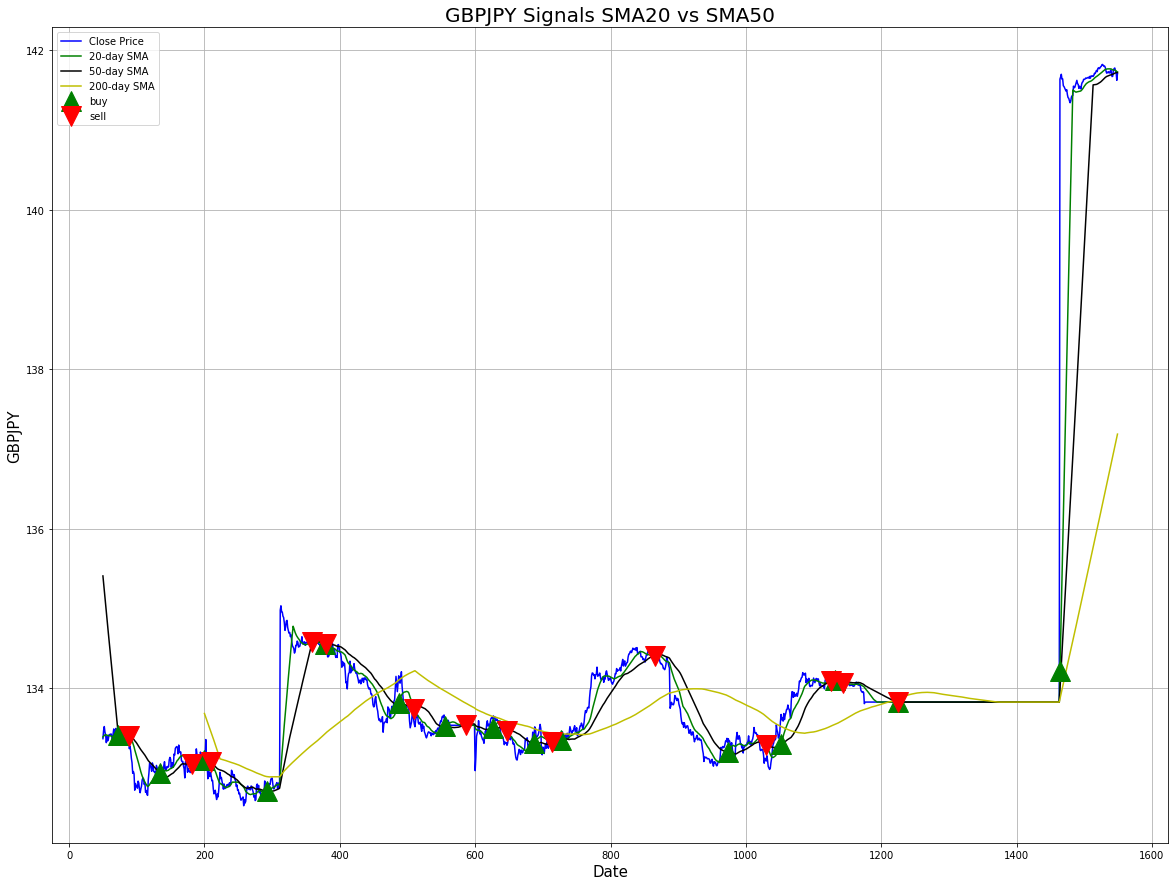

In [25]:
# Trading Strategy GBPJPY
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
gbpjpy_5min_df['Signal'] = 0.0
gbpjpy_5min_df['Signal'] = np.where(gbpjpy_5min_df['SMA20'] > gbpjpy_5min_df['SMA50'], 1.0, 0.0)
gbpjpy_5min_df['Position'] = gbpjpy_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1000 
gbpjpy_5min_df1 = gbpjpy_5min_df.reset_index().iloc[50:1550 :]


# Can see where the buy and sell signals are in a dataframe
gbpjpy_5min_df[gbpjpy_5min_df['Position']==1]
gbpjpy_5min_df[gbpjpy_5min_df['Position']==-1]


plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50
gbpjpy_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
gbpjpy_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
gbpjpy_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
gbpjpy_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')
                          
# plot ‘buy’ signals
plt.plot(gbpjpy_5min_df1[gbpjpy_5min_df1['Position'] == 1].index, 
         gbpjpy_5min_df1['SMA20'][gbpjpy_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(gbpjpy_5min_df1[gbpjpy_5min_df1['Position'] == -1].index, 
         gbpjpy_5min_df1['SMA20'][gbpjpy_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('GBPJPY', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('GBPJPY Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


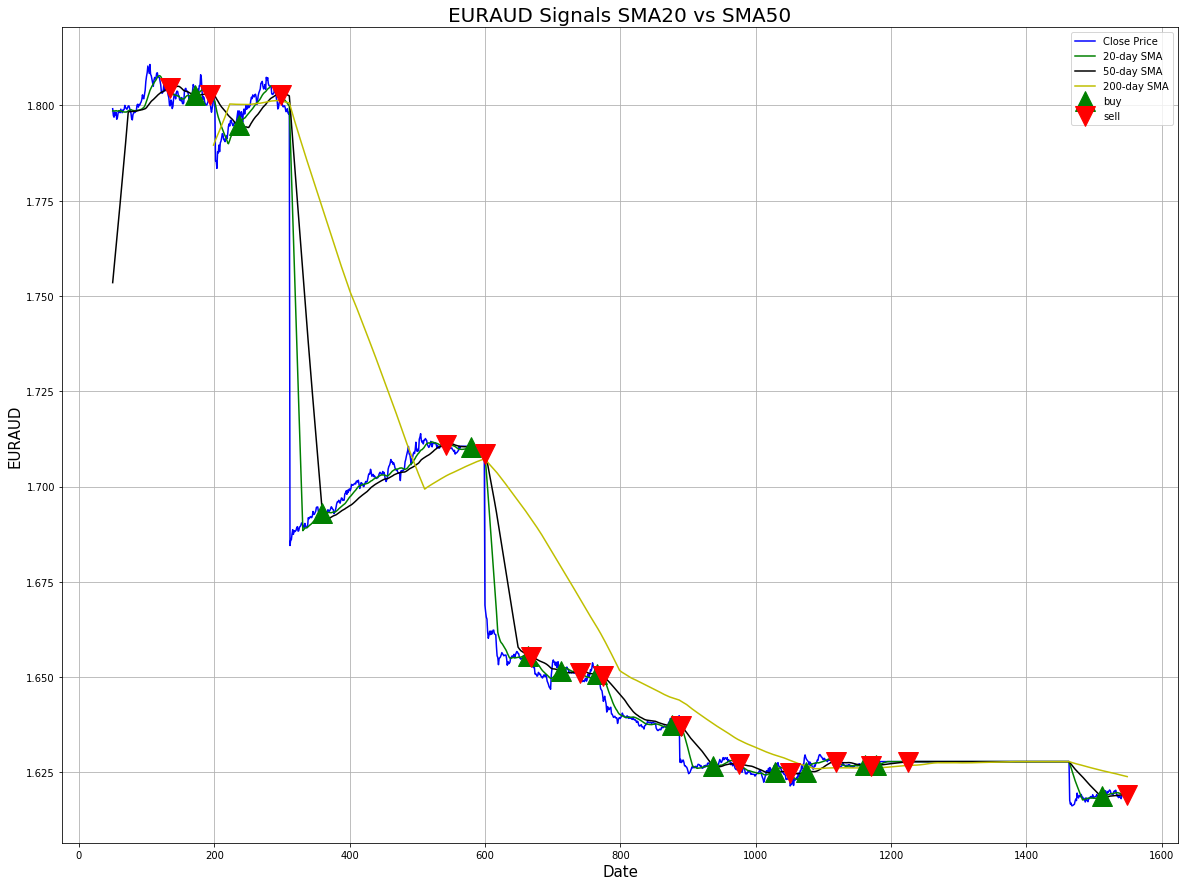

In [26]:
# Trading Strategy EURAUD
# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.
euraud_5min_df['Signal'] = 0.0
euraud_5min_df['Signal'] = np.where(euraud_5min_df['SMA20'] > euraud_5min_df['SMA50'], 1.0, 0.0)
euraud_5min_df['Position'] = euraud_5min_df['Signal'].diff()

# It is impossible to show signals for 100k data rows in a small plt chart. Using iloc to show a sample set of1000 
euraud_5min_df1 = euraud_5min_df.reset_index().iloc[50:1550 :]


# Can see where the buy and sell signals are in a dataframe
euraud_5min_df[euraud_5min_df['Position']==1]
euraud_5min_df[euraud_5min_df['Position']==-1]


plt.figure(figsize = (20,15))
# plot close price, SMA20 and SMA50
euraud_5min_df1['Close'].plot(color = 'b', label= 'Close Price')
euraud_5min_df1['SMA20'].plot(color = 'g',label = '20-day SMA') 
euraud_5min_df1['SMA50'].plot(color = 'k', label = '50-day SMA')
euraud_5min_df1['SMA200'].plot(color = 'y', label = '200-day SMA')

# plot ‘buy’ signals
plt.plot(euraud_5min_df1[euraud_5min_df1['Position'] == 1].index, 
         euraud_5min_df1['SMA20'][euraud_5min_df1['Position'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
                          
# plot ‘sell’ signals
plt.plot(euraud_5min_df1[euraud_5min_df1['Position'] == -1].index, 
         euraud_5min_df1['SMA20'][euraud_5min_df1['Position'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')
                          
plt.ylabel('EURAUD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('EURAUD Signals SMA20 vs SMA50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


In the next part of the analysis, we want to look at covariance and correlations of the straight usd pairs of our currency datasets.

Covariance is a measure to indicate the extent to which two random variables change in tandem.

Correlation is a measure used to represent how strongly two random variables are related to each other. It measures both the strength and direction of the linear relationship between two variables.

There are 8 straight usd pairs and 28 possible relationships. We will calculate covariance using Numpy and correlation using Seaborn

In [27]:
# Merge all the CLose data for all currencies into a single DF
#Resetting index
aud_df2= aud_5min_df.reset_index()
aud_df2

,Date,Open,High,Low,Close,Volume,SMA20,SMA50,SMA200,Signal,Position
0,2020-01-03 22:00:00,0.64668,0.64668,0.64623,0.64663,43.28,NaN,NaN,NaN,0.0,NaN
1,2020-01-03 22:05:00,0.64769,0.64781,0.64769,0.64780,11.82,NaN,NaN,NaN,0.0,0.0
2,2020-01-03 22:10:00,0.64845,0.64859,0.64812,0.64812,41.24,NaN,NaN,NaN,0.0,0.0
3,2020-01-03 22:15:00,0.64813,0.64826,0.64809,0.64810,15.50,NaN,NaN,NaN,0.0,0.0
4,2020-01-03 22:20:00,0.64826,0.64826,0.64826,0.64826,2.00,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
104539,2020-12-31 21:35:00,0.77026,0.77026,0.77017,0.77023,14.00,0.770750,0.770355,0.771262,1.0,0.0
104540,2020-12-31 21:40:00,0.77005,0.77005,0.76999,0.76999,34.64,0.770732,0.770344,0.771261,1.0,0.0
104541,2020-12-31 21:45:00,0.76995,0.76995,0.76989,0.76989,9.69,0.770711,0.770336,0.771261,1.0,0.0
104542,2020-12-31 21:50:00,0.76963,0.76964,0.76954,0.76958,39.72,0.770661,0.770322,0.771260,1.0,0.0


In [28]:
#pick the columns in aud_df3 that we wish to look at using loc
aud_df3 = aud_df2.loc[:,['Date','Close']]

aud_df3.rename(columns = {'Close':'AUD_close'}, inplace = True) 

aud_df3

,Date,AUD_close
0,2020-01-03 22:00:00,0.64663
1,2020-01-03 22:05:00,0.64780
2,2020-01-03 22:10:00,0.64812
3,2020-01-03 22:15:00,0.64810
4,2020-01-03 22:20:00,0.64826
...,...,...
104539,2020-12-31 21:35:00,0.77023
104540,2020-12-31 21:40:00,0.76999
104541,2020-12-31 21:45:00,0.76989
104542,2020-12-31 21:50:00,0.76958


In [29]:
# Reset index for remianing currency pairs and use loc to pick columns "Date" and "Close" to merge together later
eur_df2 = eur_5min_df.reset_index()
gbp_df2 = gbp_5min_df.reset_index()
jpy_df2 = jpy_5min_df.reset_index()
nzd_df2 = nzd_5min_df.reset_index()
sgd_df2 = sgd_5min_df.reset_index()
cnh_df2 = cnh_5min_df.reset_index()
xau_df2 = xau_5min_df.reset_index()
audjpy_df2 = audjpy_5min_df.reset_index()
eurjpy_df2 = eurjpy_5min_df.reset_index()
gbpjpy_df2 = gbpjpy_5min_df.reset_index()
euraud_df2 = euraud_5min_df.reset_index()

In [30]:
eur_df3 = eur_df2.loc[:,['Date','Close']]
eur_df3.rename(columns = {'Close':'EUR_close'}, inplace = True) 
eur_df3

,Date,EUR_close
0,2020-01-03 22:00:00,1.10411
1,2020-01-03 22:05:00,1.10427
2,2020-01-03 22:10:00,1.10413
3,2020-01-03 22:15:00,1.10431
4,2020-01-03 22:20:00,1.10416
...,...,...
104539,2020-12-31 21:35:00,1.22194
104540,2020-12-31 21:40:00,1.22194
104541,2020-12-31 21:45:00,1.22188
104542,2020-12-31 21:50:00,1.22166


In [32]:
gbp_df3 = gbp_df2.loc[:,['Date','Close']]
gbp_df3.rename(columns = {'Close':'GBP_close'}, inplace = True)

jpy_df3 = jpy_df2.loc[:,['Date','Close']]
jpy_df3.rename(columns = {'Close':'JPY_close'}, inplace = True)

nzd_df3 = nzd_df2.loc[:,['Date','Close']]
nzd_df3.rename(columns = {'Close':'NZD_close'}, inplace = True)

sgd_df3 = sgd_df2.loc[:,['Date','Close']]
sgd_df3.rename(columns = {'Close':'SGD_close'}, inplace = True)

cnh_df3 = cnh_df2.loc[:,['Date','Close']]
cnh_df3.rename(columns = {'Close':'CNH_close'}, inplace = True)

xau_df3 = xau_df2.loc[:,['Date','Close']]
xau_df3.rename(columns = {'Close':'XAU_close'}, inplace = True)

audjpy_df3 = audjpy_df2.loc[:,['Date','Close']]
audjpy_df3.rename(columns = {'Close':'AUDJPY_close'}, inplace = True)

eurjpy_df3 = eurjpy_df2.loc[:,['Date','Close']]
eurjpy_df3.rename(columns = {'Close':'EURJPY_close'}, inplace = True)

gbpjpy_df3 = gbpjpy_df2.loc[:,['Date','Close']]
gbpjpy_df3.rename(columns = {'Close':'GBPJPY_close'}, inplace = True)

euraud_df3 = euraud_df2.loc[:,['Date','Close']]
euraud_df3.rename(columns = {'Close':'EURAUD_close'}, inplace = True)


In [33]:
#Merge the aud and eur data set for the "Close" prices using key "Date"

df = pd.merge(aud_df3, eur_df3, how='inner', on='Date')
df

,Date,AUD_close,EUR_close
0,2020-01-03 22:00:00,0.64663,1.10411
1,2020-01-03 22:05:00,0.64780,1.10427
2,2020-01-03 22:10:00,0.64812,1.10413
3,2020-01-03 22:15:00,0.64810,1.10431
4,2020-01-03 22:20:00,0.64826,1.10416
...,...,...,...
104539,2020-12-31 21:35:00,0.77023,1.22194
104540,2020-12-31 21:40:00,0.76999,1.22194
104541,2020-12-31 21:45:00,0.76989,1.22188
104542,2020-12-31 21:50:00,0.76958,1.22166


In [34]:
#Merge the other pairs together into a dataframe as shown below

df1 = pd.merge(gbp_df3, jpy_df3, how='inner', on='Date')
df2 = pd.merge(nzd_df3, sgd_df3, how='inner', on='Date')
df3 = pd.merge(cnh_df3, xau_df3, how='inner', on='Date')
df4 = pd.merge(audjpy_df3, eurjpy_df3, how='inner', on='Date')
df5 = pd.merge(gbpjpy_df3, euraud_df3, how='inner', on='Date')

In [35]:
df6 = pd.merge(df, df1, how='inner', on='Date')
df7 = pd.merge(df2, df3,how='inner', on='Date')

#df8 = pd.merge(df4, df5,how='inner', on='Date' )
#we will focus on straight usd pairs correlations first as crosses will definitely be correlated with their component pairs

dataframe = pd.merge(df6, df7,how='inner', on='Date' )
dataframe

,Date,AUD_close,EUR_close,GBP_close,JPY_close,NZD_close,SGD_close,CNH_close,XAU_close
0,2020-01-03 23:00:00,0.64905,1.10551,1.28010,107.487,0.62104,1.39296,6.98921,1589.078
1,2020-01-03 23:05:00,0.64871,1.10590,1.28005,107.579,0.62151,1.39279,6.98864,1584.615
2,2020-01-03 23:10:00,0.64994,1.10698,1.28023,107.504,0.62260,1.39280,6.98775,1584.708
3,2020-01-03 23:15:00,0.65083,1.10708,1.28071,107.631,0.62307,1.39289,6.98675,1577.275
4,2020-01-03 23:20:00,0.65074,1.10708,1.28021,107.579,0.62290,1.39250,6.98699,1580.645
...,...,...,...,...,...,...,...,...,...
104527,2020-12-31 21:35:00,0.77023,1.22194,1.36685,103.272,0.71874,1.32145,6.50074,1897.758
104528,2020-12-31 21:40:00,0.76999,1.22194,1.36697,103.276,0.71866,1.32144,6.50070,1897.978
104529,2020-12-31 21:45:00,0.76989,1.22188,1.36673,103.282,0.71871,1.32083,6.50065,1897.805
104530,2020-12-31 21:50:00,0.76958,1.22166,1.36644,103.291,0.71837,1.32108,6.50081,1897.735


==========================================================================================================

# COVARIANCE ANALYSIS

In [39]:
#Covariance Study 
from numpy import cov

data_eur = dataframe["EUR_close"]
data_aud = dataframe["AUD_close"]
data_gbp = dataframe["GBP_close"]
data_nzd = dataframe["NZD_close"]
data_jpy = dataframe["JPY_close"]
data_cnh = dataframe["CNH_close"]
data_sgd = dataframe["SGD_close"]
data_xau = dataframe["XAU_close"]

X = np.array([data_eur, data_aud, data_gbp, data_nzd, data_jpy, data_cnh, data_sgd, data_xau])
print(np.cov(X))

[[ 1.96736295e-03  1.65111958e-03  1.33846816e-03  1.27009579e-03
  -7.29828737e-02 -7.27123644e-03 -1.08924050e-03  5.11243982e+00]
 [ 1.65111958e-03  1.70193831e-03  1.37480916e-03  1.30966107e-03
  -5.49335132e-02 -6.28798219e-03 -1.12678158e-03  4.34498406e+00]
 [ 1.33846816e-03  1.37480916e-03  1.62495930e-03  1.17917664e-03
  -4.09148552e-02 -6.22406121e-03 -1.13087903e-03  2.59217250e+00]
 [ 1.27009579e-03  1.30966107e-03  1.17917664e-03  1.09815227e-03
  -4.06392777e-02 -5.48825096e-03 -9.64568770e-04  2.69813981e+00]
 [-7.29828737e-02 -5.49335132e-02 -4.09148552e-02 -4.06392777e-02
   3.98668639e+00  2.81533385e-01  3.39744966e-02 -2.10426607e+02]
 [-7.27123644e-03 -6.28798219e-03 -6.22406121e-03 -5.48825096e-03
   2.81533385e-01  3.80954390e-02  5.14669345e-03 -1.45450639e+01]
 [-1.08924050e-03 -1.12678158e-03 -1.13087903e-03 -9.64568770e-04
   3.39744966e-02  5.14669345e-03  9.30442977e-04 -2.06027185e+00]
 [ 5.11243982e+00  4.34498406e+00  2.59217250e+00  2.69813981e+00
  -

The above result is too heavy to plot and is confusing for the user of the data insights

Instead we may want to look into a smaller data subset for example EUR and AUD below. We can then plot a heatmap using seaborn and matplotlib

Suppose we focus on the EUR, we will calculate the covariance matrix for EUR vs other pairs

In [66]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

data_eur_nzd_gbp = np.array([data_eur, data_nzd, data_gbp])
print(np.cov(data_eur_nzd_gbp))

[[0.00196736 0.0012701  0.00133847]
 [0.0012701  0.00109815 0.00117918]
 [0.00133847 0.00117918 0.00162496]]


In [70]:
data_eur_sgd_jpy = np.array([data_eur, data_sgd, data_jpy])
print(np.cov(data_eur_sgd_jpy))


[[ 1.96736295e-03 -1.08924050e-03 -7.29828737e-02]
 [-1.08924050e-03  9.30442977e-04  3.39744966e-02]
 [-7.29828737e-02  3.39744966e-02  3.98668639e+00]]


In [69]:
data_eur_cnh_xau = np.array([data_eur, data_cnh, data_xau])
print(np.cov(data_eur_cnh_xau))


[[ 1.96736295e-03 -7.27123644e-03  5.11243982e+00]
 [-7.27123644e-03  3.80954390e-02 -1.45450639e+01]
 [ 5.11243982e+00 -1.45450639e+01  1.98730338e+04]]


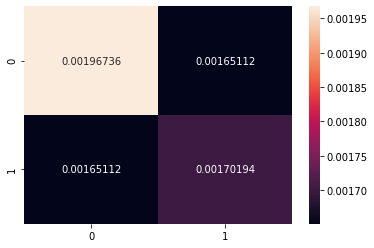

In [60]:
#Example of how to plot a heatmap
#my pc stalls on a 3 by 3 matrix plot so cant show 
cov_eur_aud = np.cov(data_eur,data_aud)
sn.heatmap(cov_eur_aud, annot=True, fmt='g')
plt.show()

#this shows that EUR and AUD have positive covariance ie they tend to move together

Conclusion:

EUR with AUD, NZD, GBP or XAU have positive covariance and tend to move together

EUR with JPY, CNH, SGD have negative covariance and tend to move in opposite direction

We can repeat this analysis with the subsequent pairs as below.
AUD, GBP, NZD, JPY, CNH, SGD, XAU

In [100]:
# FOR AUD
data_aud_gbp_nzd = np.array([data_aud, data_gbp, data_nzd])
print(np.cov(data_aud_gbp_nzd))


[[0.00170194 0.00137481 0.00130966]
 [0.00137481 0.00162496 0.00117918]
 [0.00130966 0.00117918 0.00109815]]


In [74]:
data_aud_jpy_cnh = np.array([data_aud, data_jpy, data_cnh])
print(np.cov(data_aud_jpy_cnh))


[[ 1.70193831e-03 -5.49335132e-02 -6.28798219e-03]
 [-5.49335132e-02  3.98668639e+00  2.81533385e-01]
 [-6.28798219e-03  2.81533385e-01  3.80954390e-02]]


In [73]:
data_aud_sgd_xau = np.array([data_aud, data_sgd, data_xau])
print(np.cov(data_aud_sgd_xau))


[[ 1.70193831e-03 -1.12678158e-03  4.34498406e+00]
 [-1.12678158e-03  9.30442977e-04 -2.06027185e+00]
 [ 4.34498406e+00 -2.06027185e+00  1.98730338e+04]]


Conclusion

AUD has positive covariance with GBP, NZD, EUR(in previous cells), XAU

AUD with JPY, CNH, SGD have negative covariance and tend to move in opposite direction

In [85]:
# For NZD
data_nzd_eur_aud = np.array([data_nzd, data_eur, data_aud])
print(np.cov(data_nzd_eur_aud))


[[0.00109815 0.0012701  0.00130966]
 [0.0012701  0.00196736 0.00165112]
 [0.00130966 0.00165112 0.00170194]]


In [84]:
data_nzd_gbp_jpy = np.array([data_nzd, data_gbp, data_jpy])
print(np.cov(data_nzd_gbp_jpy))


[[ 1.09815227e-03  1.17917664e-03 -4.06392777e-02]
 [ 1.17917664e-03  1.62495930e-03 -4.09148552e-02]
 [-4.06392777e-02 -4.09148552e-02  3.98668639e+00]]


In [83]:
data_nzd_cnh_xau_sgd = np.array([data_nzd, data_cnh, data_xau, data_sgd])
print(np.cov(data_nzd_cnh_xau_sgd))

[[ 1.09815227e-03 -5.48825096e-03  2.69813981e+00 -9.64568770e-04]
 [-5.48825096e-03  3.80954390e-02 -1.45450639e+01  5.14669345e-03]
 [ 2.69813981e+00 -1.45450639e+01  1.98730338e+04 -2.06027185e+00]
 [-9.64568770e-04  5.14669345e-03 -2.06027185e+00  9.30442977e-04]]


Conclusion

NZD with AUD, NZD, GBP or XAU have positive covariance and tend to move together

NZD with JPY, CNH, SGD have negative covariance and tend to move in opposite direction

In [86]:
# For GBP
data_gbp_eur_aud = np.array([data_gbp, data_eur, data_aud])
print(np.cov(data_gbp_eur_aud))

[[0.00162496 0.00133847 0.00137481]
 [0.00133847 0.00196736 0.00165112]
 [0.00137481 0.00165112 0.00170194]]


In [87]:
data_gbp_nzd_jpy = np.array([data_gbp, data_nzd, data_jpy])
print(np.cov(data_gbp_nzd_jpy))

[[ 1.62495930e-03  1.17917664e-03 -4.09148552e-02]
 [ 1.17917664e-03  1.09815227e-03 -4.06392777e-02]
 [-4.09148552e-02 -4.06392777e-02  3.98668639e+00]]


In [88]:
data_gbp_cnh_xau_sgd = np.array([data_gbp, data_cnh, data_xau, data_sgd])
print(np.cov(data_gbp_cnh_xau_sgd))

[[ 1.62495930e-03 -6.22406121e-03  2.59217250e+00 -1.13087903e-03]
 [-6.22406121e-03  3.80954390e-02 -1.45450639e+01  5.14669345e-03]
 [ 2.59217250e+00 -1.45450639e+01  1.98730338e+04 -2.06027185e+00]
 [-1.13087903e-03  5.14669345e-03 -2.06027185e+00  9.30442977e-04]]


Conclusion


GBP with EUR, AUD, NZD,  or XAU have positive covariance and tend to move together

GBP with JPY, CNH, SGD have negative covariance and tend to move in opposite direction

In [91]:
# For JPY
data_jpy_eur_aud = np.array([data_jpy, data_eur, data_aud])
print(np.cov(data_jpy_eur_aud))

[[ 3.98668639e+00 -7.29828737e-02 -5.49335132e-02]
 [-7.29828737e-02  1.96736295e-03  1.65111958e-03]
 [-5.49335132e-02  1.65111958e-03  1.70193831e-03]]


In [92]:
data_jpy_nzd_gbp = np.array([data_jpy, data_nzd, data_gbp])
print(np.cov(data_jpy_nzd_gbp))

[[ 3.98668639e+00 -4.06392777e-02 -4.09148552e-02]
 [-4.06392777e-02  1.09815227e-03  1.17917664e-03]
 [-4.09148552e-02  1.17917664e-03  1.62495930e-03]]


In [93]:
data_jpy_cnh_xau_sgd = np.array([data_jpy, data_cnh, data_xau, data_sgd])
print(np.cov(data_jpy_cnh_xau_sgd))

[[ 3.98668639e+00  2.81533385e-01 -2.10426607e+02  3.39744966e-02]
 [ 2.81533385e-01  3.80954390e-02 -1.45450639e+01  5.14669345e-03]
 [-2.10426607e+02 -1.45450639e+01  1.98730338e+04 -2.06027185e+00]
 [ 3.39744966e-02  5.14669345e-03 -2.06027185e+00  9.30442977e-04]]


Conclusion

JPY with EUR, AUD, NZD, GBP or XAU have negative covariance and tend to move in opposite direction

JPY with CNH, SGD  have positive covariance and tend to move together

In [98]:
# For CNH
data_cnh_eur_aud = np.array([data_cnh, data_eur, data_aud])
print(np.cov(data_cnh_eur_aud))

[[ 0.03809544 -0.00727124 -0.00628798]
 [-0.00727124  0.00196736  0.00165112]
 [-0.00628798  0.00165112  0.00170194]]


In [104]:
data_cnh_gbp_nzd = np.array([data_cnh, data_gbp, data_nzd])
print(np.cov(data_cnh_gbp_nzd))

#refer to above cov(data_jpy_cnh_xau_sgd) for covariance of these pairs

[[ 0.03809544 -0.00622406 -0.00548825]
 [-0.00622406  0.00162496  0.00117918]
 [-0.00548825  0.00117918  0.00109815]]


Conclusion

CNH with EUR, AUD, NZD, GBP or XAU have negative covariance and tend to move in opposite direction

CNH with JPY, SGD  have positive covariance and tend to move together

In [113]:
# For XAU
data_xau_eur_aud = np.array([data_xau, data_eur, data_aud])
print(np.cov(data_xau_eur_aud))

[[1.98730338e+04 5.11243982e+00 4.34498406e+00]
 [5.11243982e+00 1.96736295e-03 1.65111958e-03]
 [4.34498406e+00 1.65111958e-03 1.70193831e-03]]


In [114]:
data_xau_nzd_gbp = np.array([data_xau, data_nzd, data_gbp])
print(np.cov(data_xau_nzd_gbp))


#refer to above cov(data_jpy_cnh_xau_sgd) for covariance of these pairs

[[1.98730338e+04 2.69813981e+00 2.59217250e+00]
 [2.69813981e+00 1.09815227e-03 1.17917664e-03]
 [2.59217250e+00 1.17917664e-03 1.62495930e-03]]


Conclusion

XAU with EUR, AUD, NZD, or GBP have positive covariance and tend to move together

XAU with JPY, CNH, SGD have negative covariance and tend to move in opposite direction


In [117]:
# For SGD
data_sgd_eur_aud = np.array([data_sgd, data_eur, data_aud])
print(np.cov(data_sgd_eur_aud))

[[ 0.00093044 -0.00108924 -0.00112678]
 [-0.00108924  0.00196736  0.00165112]
 [-0.00112678  0.00165112  0.00170194]]


In [118]:
data_sgd_nzd_gbp = np.array([data_sgd, data_nzd, data_gbp])
print(np.cov(data_sgd_eur_aud))
#refer to above cov(data_jpy_cnh_xau_sgd) for covariance of these pairs

[[ 0.00093044 -0.00108924 -0.00112678]
 [-0.00108924  0.00196736  0.00165112]
 [-0.00112678  0.00165112  0.00170194]]


Conclusion

SGD with EUR, AUD, NZD, GBP or XAU have negative covariance and tend to move in opposite direction

SGD with JPY, CNH have positive covariance and tend to move together

===========================================================================================

# CORRELATION ANALYSIS

In [52]:
#Next step we will calculate the correlation among the pairs using seaborn
import seaborn as sns
dataframe.corr()

,AUD_close,EUR_close,GBP_close,JPY_close,NZD_close,SGD_close,CNH_close,XAU_close
AUD_close,1.000000,0.902328,0.826703,-0.666898,0.957978,-0.895412,-0.780913,0.747109
EUR_close,0.902328,1.000000,0.748591,-0.824086,0.864098,-0.805076,-0.839904,0.817624
GBP_close,0.826703,0.748591,1.000000,-0.508339,0.882727,-0.919708,-0.791072,0.456153
JPY_close,-0.666898,-0.824086,-0.508339,1.000000,-0.614198,0.557830,0.722416,-0.747588
NZD_close,0.957978,0.864098,0.882727,-0.614198,1.000000,-0.954239,-0.848528,0.577565
SGD_close,-0.895412,-0.805076,-0.919708,0.557830,-0.954239,1.000000,0.864464,-0.479124
CNH_close,-0.780913,-0.839904,-0.791072,0.722416,-0.848528,0.864464,1.000000,-0.528624
XAU_close,0.747109,0.817624,0.456153,-0.747588,0.577565,-0.479124,-0.528624,1.000000


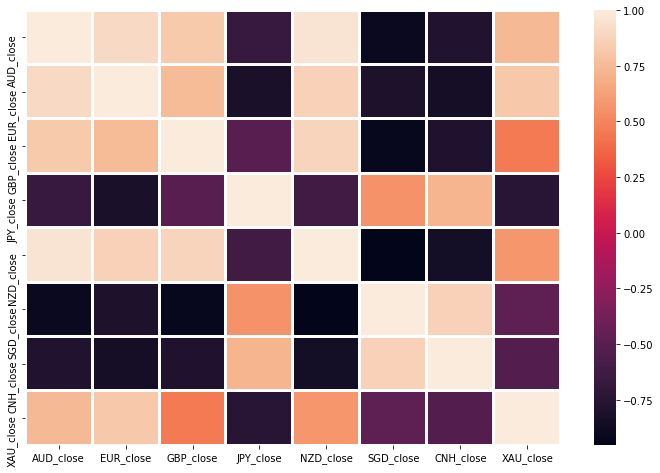

In [123]:
plt.subplots(figsize=(12,8))
sns.heatmap(dataframe.corr(),linewidths=2);

# Next we will use sns.lmplot to fit a linear regression line for EUR vs the other straight usd pairs.

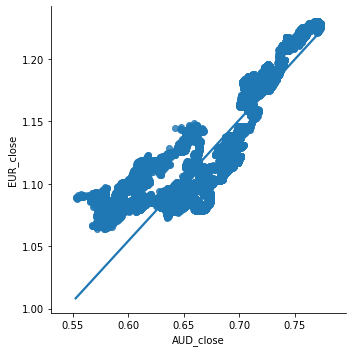

In [80]:
# Plot regression line for EUR as y-variable and other straight usd pair as x-variable
# Want to see if high correlation means the x and y variables have a good fit regression line

sns.lmplot(x = "AUD_close", y = "EUR_close",data = dataframe, fit_reg =True)

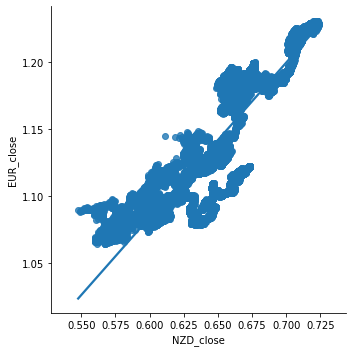

In [81]:
sns.lmplot(x = "NZD_close", y = "EUR_close",data = dataframe, fit_reg =True)


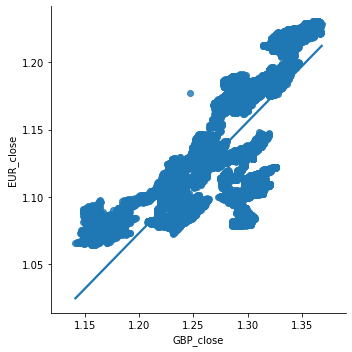

In [89]:
sns.lmplot(x = "GBP_close", y = "EUR_close",data = dataframe, fit_reg =True)

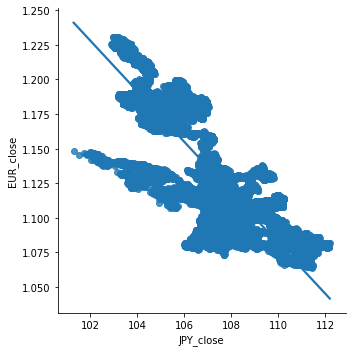

In [90]:
sns.lmplot(x = "JPY_close", y = "EUR_close",data = dataframe, fit_reg =True)

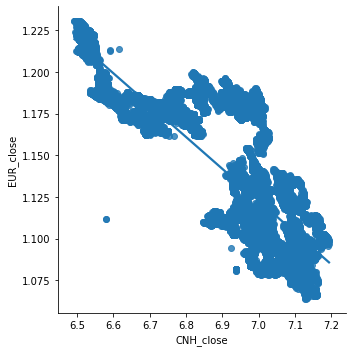

In [94]:
sns.lmplot(x = "CNH_close", y = "EUR_close",data = dataframe, fit_reg =True)

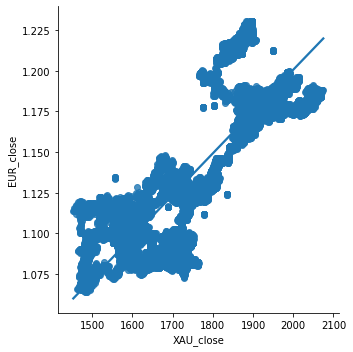

In [95]:
sns.lmplot(x = "XAU_close", y = "EUR_close",data = dataframe, fit_reg =True)

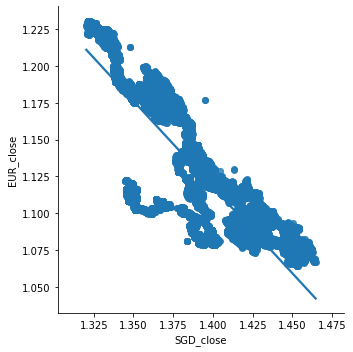

In [96]:
sns.lmplot(x = "SGD_close", y = "EUR_close",data = dataframe, fit_reg =True)

Next we fit a linear regression line for AUD vs the other pairs.

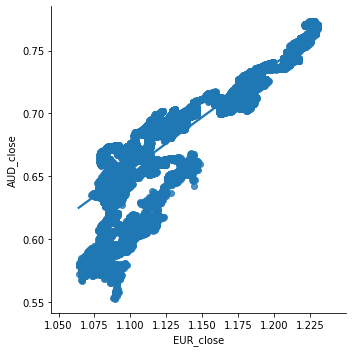

In [97]:
sns.lmplot(x = "EUR_close", y = "AUD_close",data = dataframe, fit_reg =True)

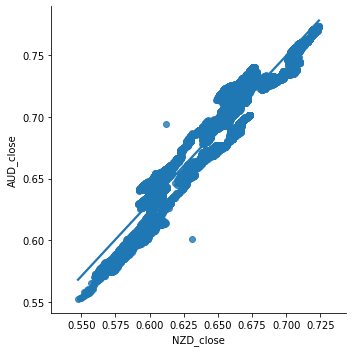

In [99]:
sns.lmplot(x = "NZD_close", y = "AUD_close",data = dataframe, fit_reg =True)

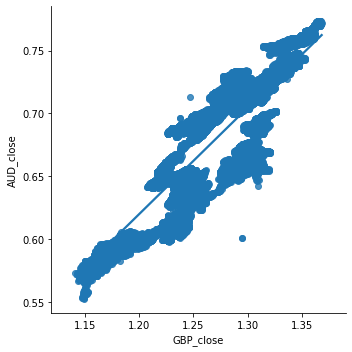

In [101]:
sns.lmplot(x = "GBP_close", y = "AUD_close",data = dataframe, fit_reg =True)

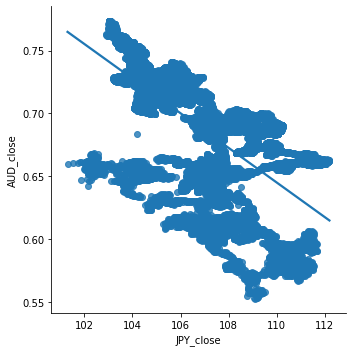

In [102]:
sns.lmplot(x = "JPY_close", y = "AUD_close",data = dataframe, fit_reg =True)

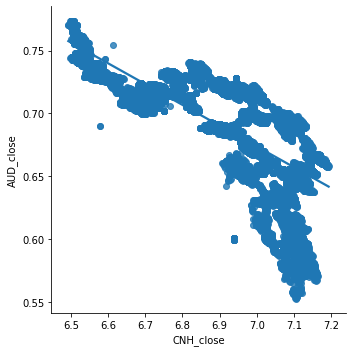

In [105]:
sns.lmplot(x = "CNH_close", y = "AUD_close",data = dataframe, fit_reg =True)

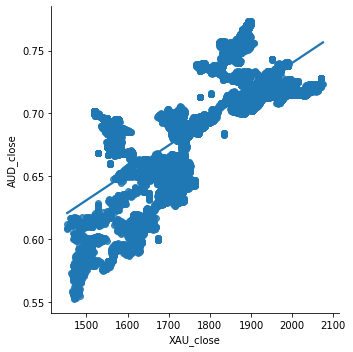

In [106]:
sns.lmplot(x = "XAU_close", y = "AUD_close",data = dataframe, fit_reg =True)

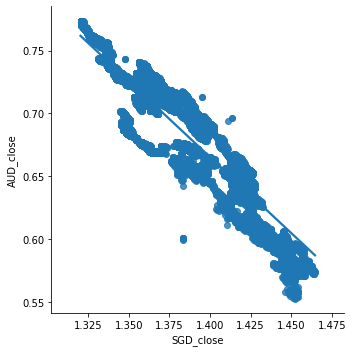

In [107]:
sns.lmplot(x = "SGD_close", y = "AUD_close",data = dataframe, fit_reg =True)

Next we fit a best fit linear regression line for GBP vs the other pairs.

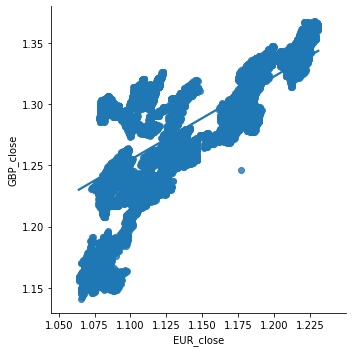

In [108]:
sns.lmplot(x = "EUR_close", y = "GBP_close",data = dataframe, fit_reg =True)

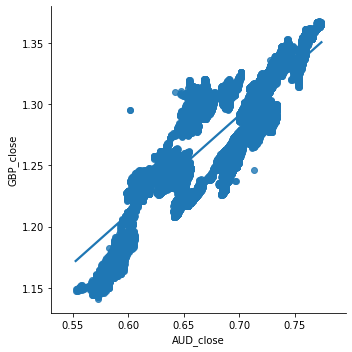

In [115]:
sns.lmplot(x = "AUD_close", y = "GBP_close",data = dataframe, fit_reg =True)

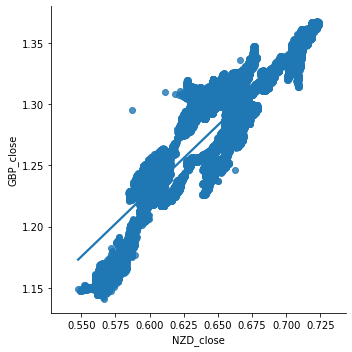

In [116]:
sns.lmplot(x = "NZD_close", y = "GBP_close",data = dataframe, fit_reg =True)

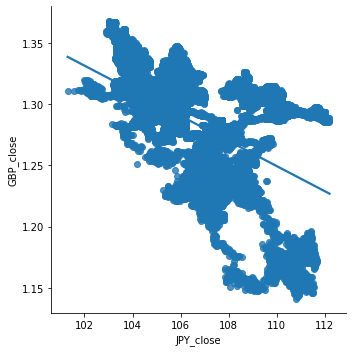

In [119]:
sns.lmplot(x = "JPY_close", y = "GBP_close",data = dataframe, fit_reg =True)

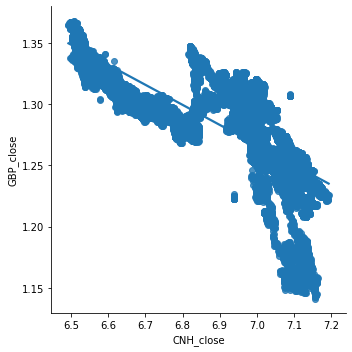

In [120]:
sns.lmplot(x = "CNH_close", y = "GBP_close",data = dataframe, fit_reg =True)

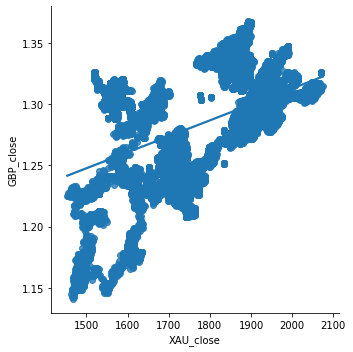

In [121]:
sns.lmplot(x = "XAU_close", y = "GBP_close",data = dataframe, fit_reg =True)

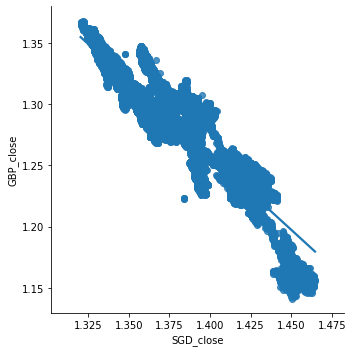

In [124]:
sns.lmplot(x = "SGD_close", y = "GBP_close",data = dataframe, fit_reg =True)

Next we plot a best fit linear regression line for NZD vs the other pairs.

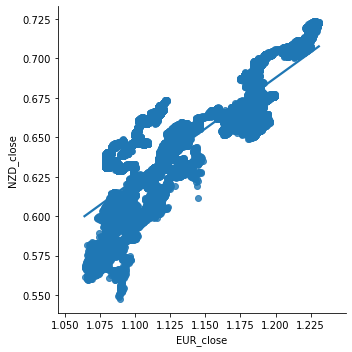

In [125]:
sns.lmplot(x = "EUR_close", y = "NZD_close",data = dataframe, fit_reg =True)

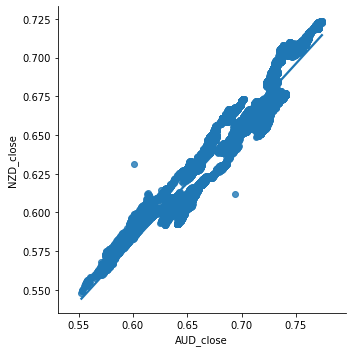

In [126]:
sns.lmplot(x = "AUD_close", y = "NZD_close",data = dataframe, fit_reg =True)

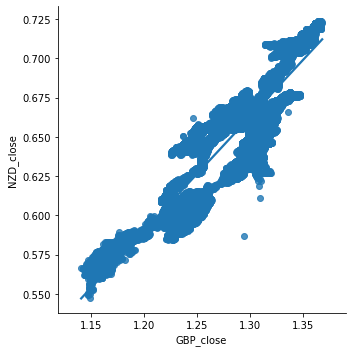

In [127]:
sns.lmplot(x = "GBP_close", y = "NZD_close",data = dataframe, fit_reg =True)

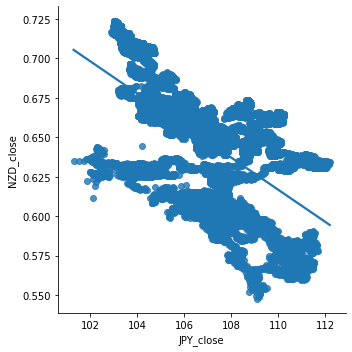

In [128]:
sns.lmplot(x = "JPY_close", y = "NZD_close",data = dataframe, fit_reg =True)

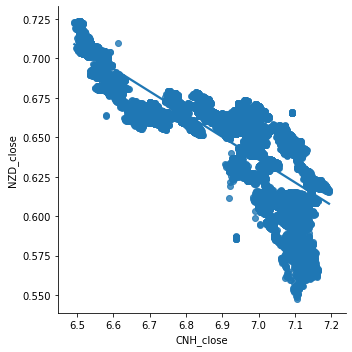

In [129]:
sns.lmplot(x = "CNH_close", y = "NZD_close",data = dataframe, fit_reg =True)

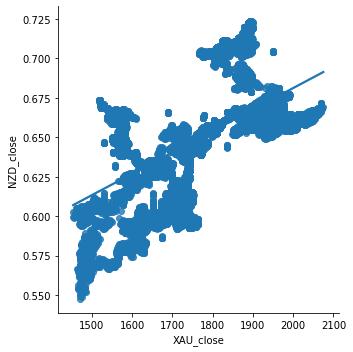

In [130]:
sns.lmplot(x = "XAU_close", y = "NZD_close",data = dataframe, fit_reg =True)

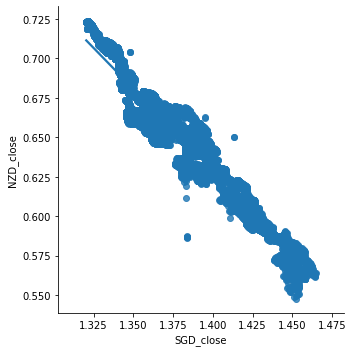

In [131]:
sns.lmplot(x = "SGD_close", y = "NZD_close",data = dataframe, fit_reg =True)

Next we plot a best fit linear regression line for JPY vs the other pairs.

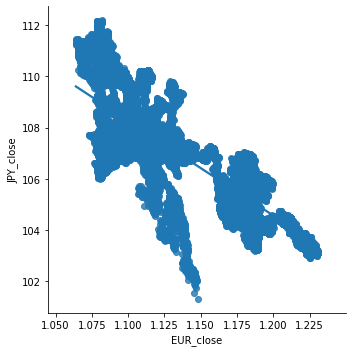

In [132]:
sns.lmplot(x = "EUR_close", y = "JPY_close",data = dataframe, fit_reg =True)

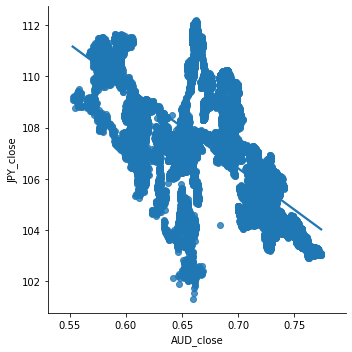

In [133]:
sns.lmplot(x = "AUD_close", y = "JPY_close",data = dataframe, fit_reg =True)

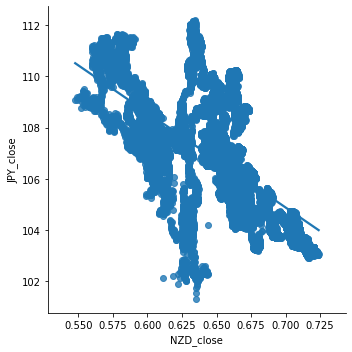

In [134]:
sns.lmplot(x = "NZD_close", y = "JPY_close",data = dataframe, fit_reg =True)

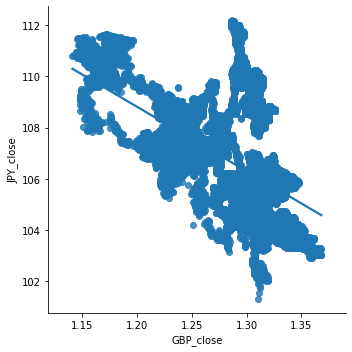

In [135]:
sns.lmplot(x = "GBP_close", y = "JPY_close",data = dataframe, fit_reg =True)

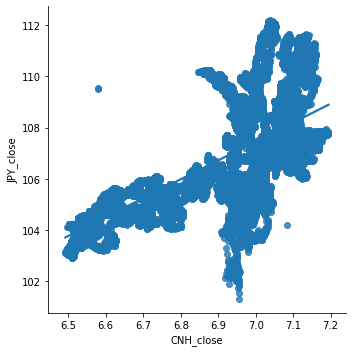

In [136]:
sns.lmplot(x = "CNH_close", y = "JPY_close",data = dataframe, fit_reg =True)

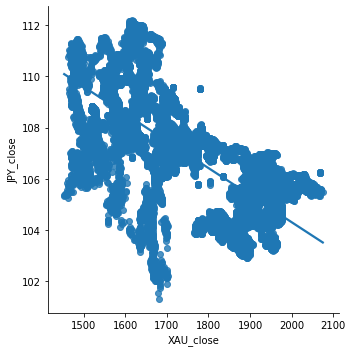

In [137]:
sns.lmplot(x = "XAU_close", y = "JPY_close",data = dataframe, fit_reg =True)

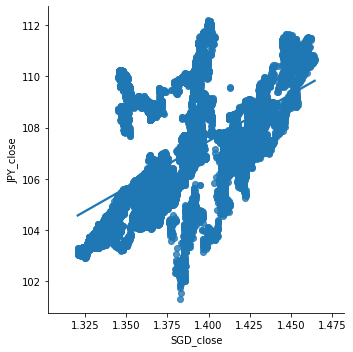

In [138]:
sns.lmplot(x = "SGD_close", y = "JPY_close",data = dataframe, fit_reg =True)

Next we plot a best fit linear regression line for CNH vs the other pairs.

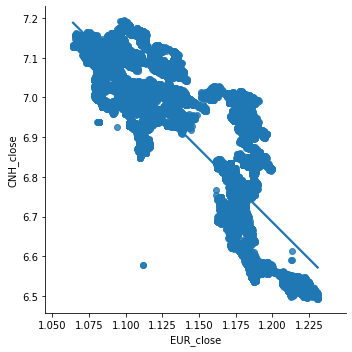

In [139]:
sns.lmplot(x = "EUR_close", y = "CNH_close",data = dataframe, fit_reg =True)

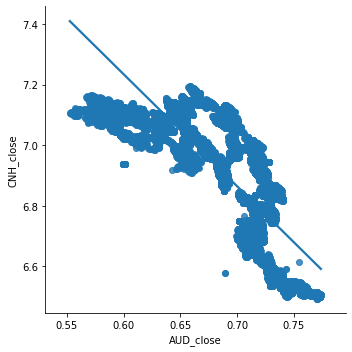

In [140]:
sns.lmplot(x = "AUD_close", y = "CNH_close",data = dataframe, fit_reg =True)

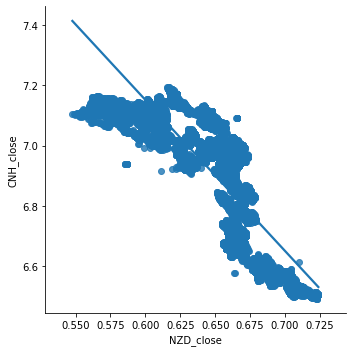

In [141]:
sns.lmplot(x = "NZD_close", y = "CNH_close",data = dataframe, fit_reg =True)

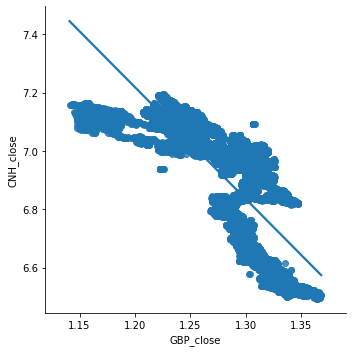

In [142]:
sns.lmplot(x = "GBP_close", y = "CNH_close",data = dataframe, fit_reg =True)

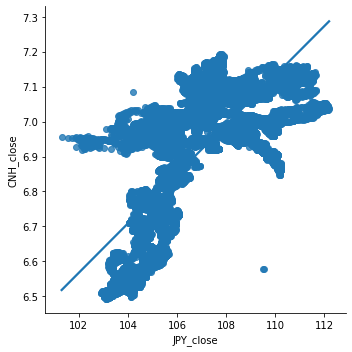

In [143]:
sns.lmplot(x = "JPY_close", y = "CNH_close",data = dataframe, fit_reg =True)

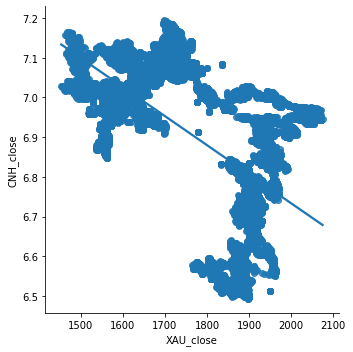

In [144]:
sns.lmplot(x = "XAU_close", y = "CNH_close",data = dataframe, fit_reg =True)

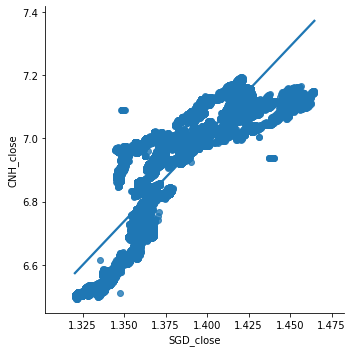

In [145]:
sns.lmplot(x = "SGD_close", y = "CNH_close",data = dataframe, fit_reg =True)

Next we plot a best fit linear regression line for XAU vs the other pairs

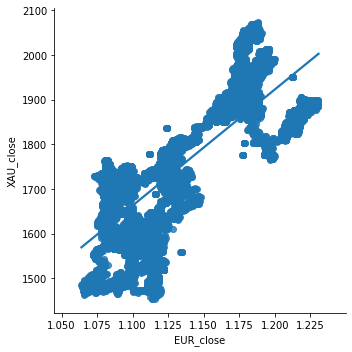

In [146]:
sns.lmplot(x = "EUR_close", y = "XAU_close",data = dataframe, fit_reg =True)

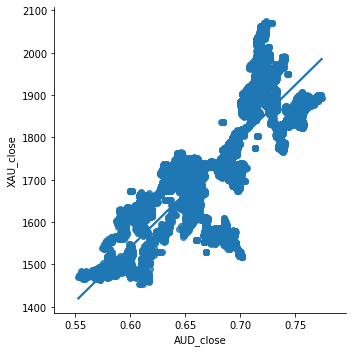

In [147]:
sns.lmplot(x = "AUD_close", y = "XAU_close",data = dataframe, fit_reg =True)

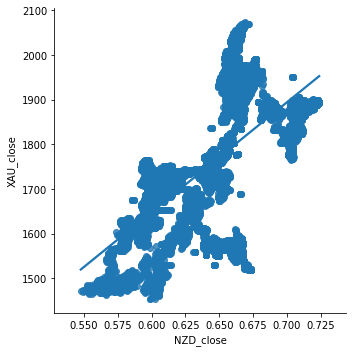

In [148]:
sns.lmplot(x = "NZD_close", y = "XAU_close",data = dataframe, fit_reg =True)

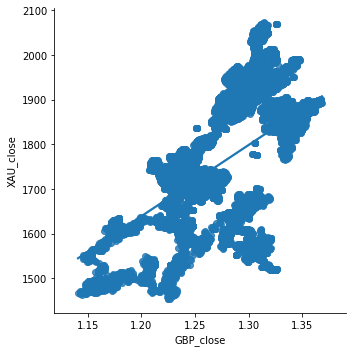

In [149]:
sns.lmplot(x = "GBP_close", y = "XAU_close",data = dataframe, fit_reg =True)

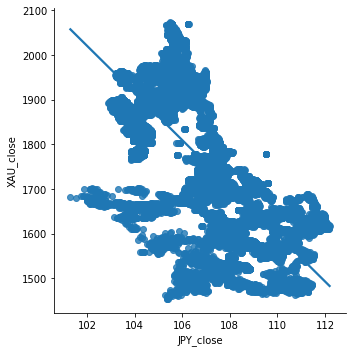

In [150]:
sns.lmplot(x = "JPY_close", y = "XAU_close",data = dataframe, fit_reg =True)

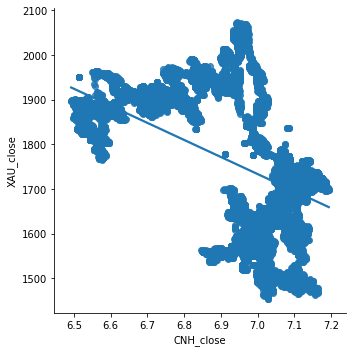

In [151]:
sns.lmplot(x = "CNH_close", y = "XAU_close",data = dataframe, fit_reg =True)

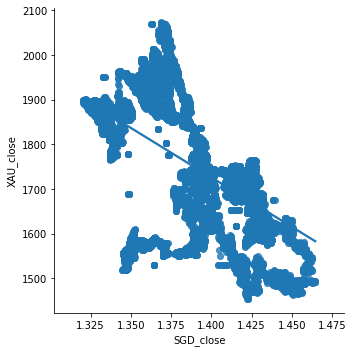

In [152]:
sns.lmplot(x = "SGD_close", y = "XAU_close",data = dataframe, fit_reg =True)

Next we plot a best fit linear regression line for SGD vs the other pairs

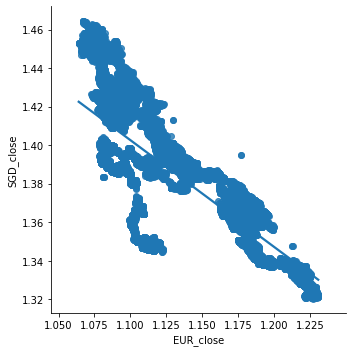

In [153]:
sns.lmplot(x = "EUR_close", y = "SGD_close",data = dataframe, fit_reg =True)

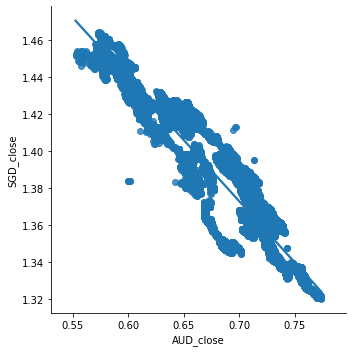

In [154]:
sns.lmplot(x = "AUD_close", y = "SGD_close",data = dataframe, fit_reg =True)

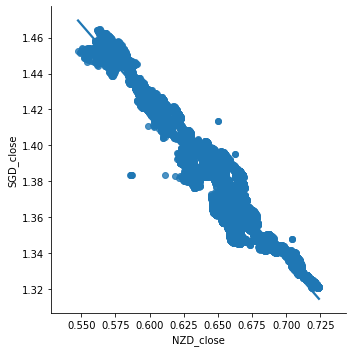

In [155]:
sns.lmplot(x = "NZD_close", y = "SGD_close",data = dataframe, fit_reg =True)

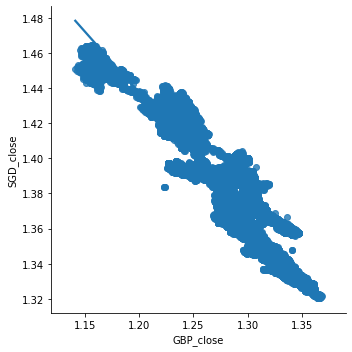

In [156]:
sns.lmplot(x = "GBP_close", y = "SGD_close",data = dataframe, fit_reg =True)

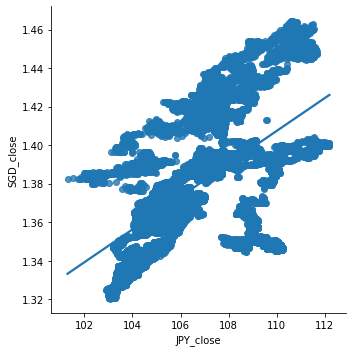

In [157]:
sns.lmplot(x = "JPY_close", y = "SGD_close",data = dataframe, fit_reg =True)

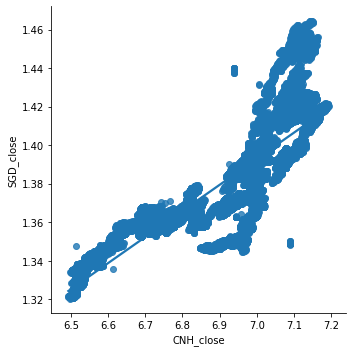

In [158]:
sns.lmplot(x = "CNH_close", y = "SGD_close",data = dataframe, fit_reg =True)

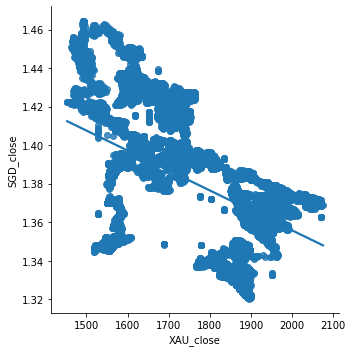

In [159]:
sns.lmplot(x = "XAU_close", y = "SGD_close",data = dataframe, fit_reg =True)

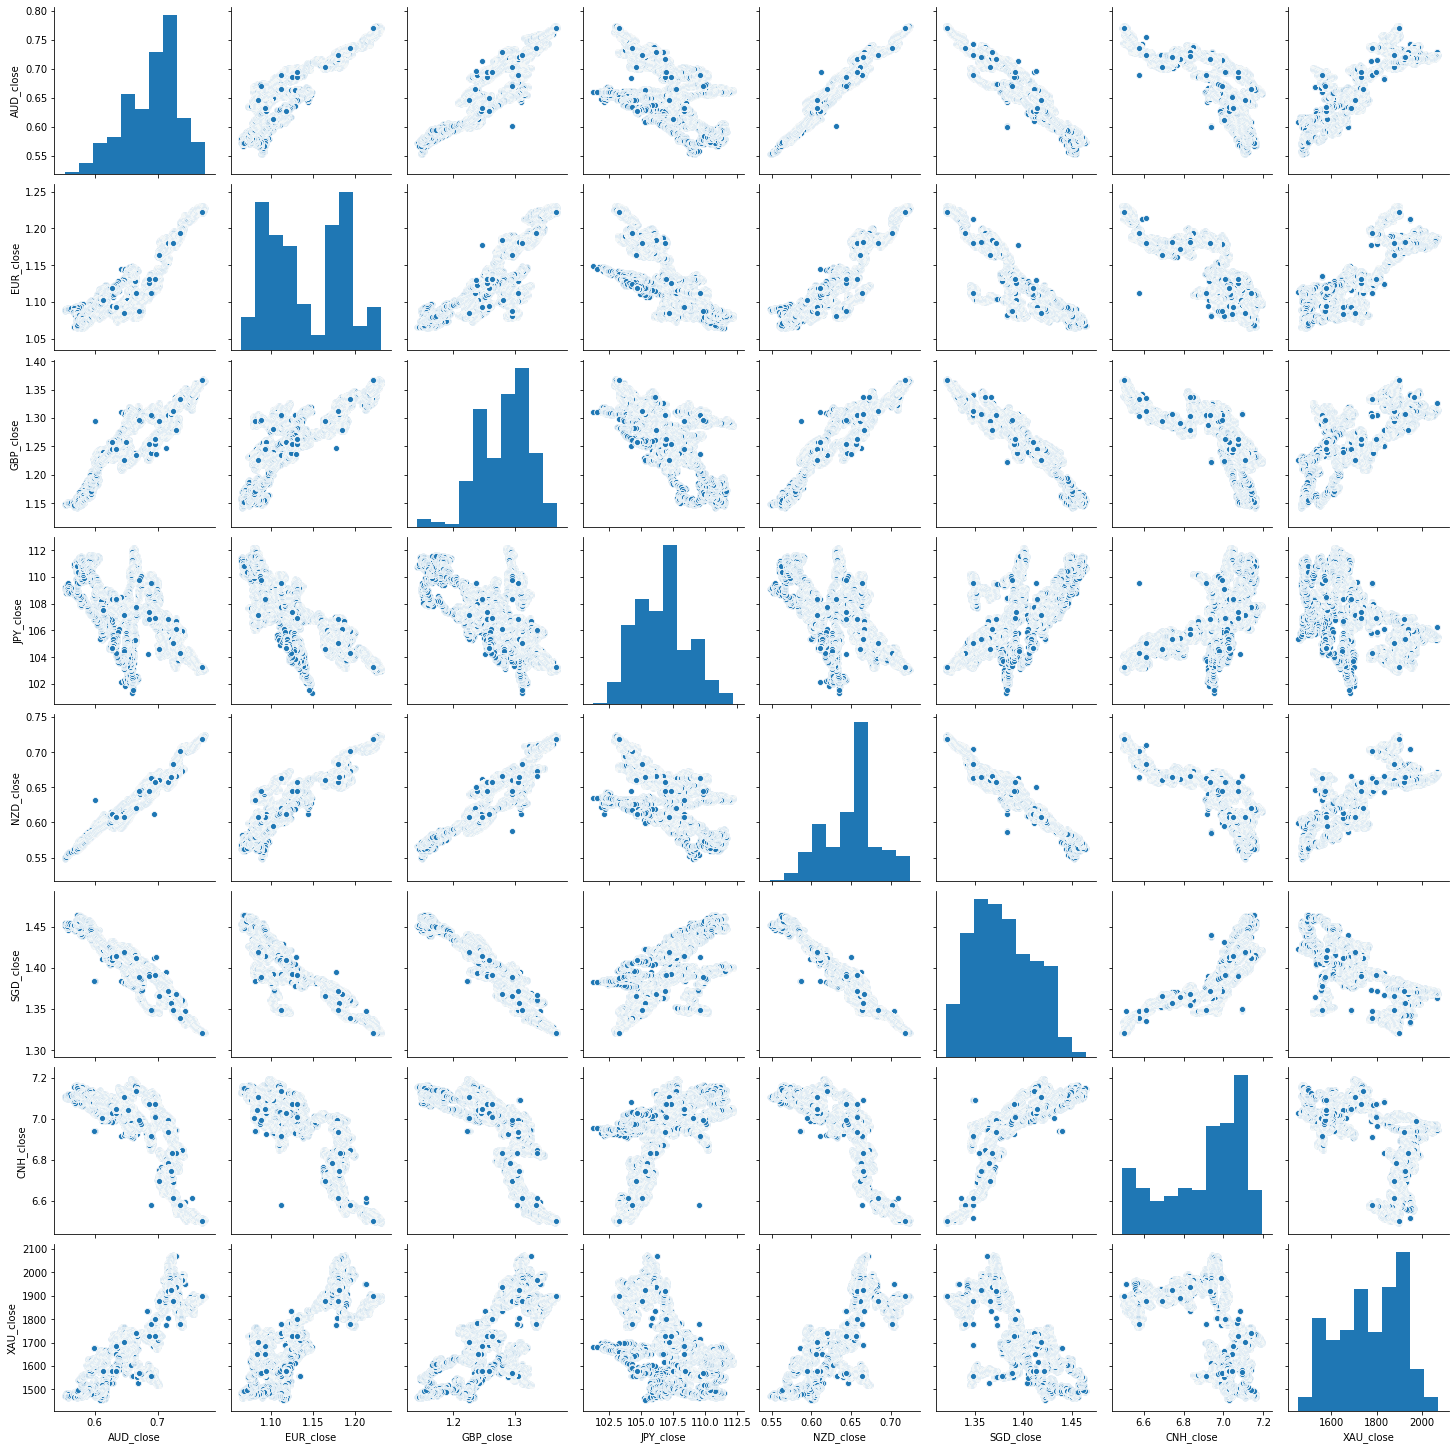

In [77]:
#A quick summary visualisation 
sns.pairplot(dataframe)

Now we proceed to find out if there is basis for arbitrage of our 4 pairs of crosses (AUDJPY, EURJPY, GBPJPY, EURAUD) versus the product of their straight usd component pairs.

In [ ]:
#Merge the dataframe and add new columns for the implied cross
df8 = pd.merge(df4, df5,how='inner', on='Date' )
df_all = pd.merge(df8, dataframe, how = 'inner', on='Date')

In [ ]:
df_all["AUDJPY_implied"] = df_all['AUD_close'] * df_all['JPY_close']
df_all["EURJPY_implied"] = df_all['EUR_close'] * df_all['JPY_close']
df_all["GBPJPY_implied"] = df_all['GBP_close'] * df_all['JPY_close']
df_all["EURAUD_implied"] = df_all['EUR_close'] / df_all['AUD_close']

In [ ]:
df_all['AUDJPY_arb'] = df_all["AUDJPY_implied"] - df_all["AUDJPY_close"]
df_all['EURJPY_arb'] = df_all["EURJPY_implied"] - df_all["EURJPY_close"]
df_all['GBPJPY_arb'] = df_all["GBPJPY_implied"] - df_all["GBPJPY_close"]
df_all['EURAUD_arb'] = df_all["EURAUD_implied"] - df_all["EURAUD_close"]

In [ ]:
df_all.head(10)

In [ ]:
df_all[["AUDJPY_arb","EURJPY_arb","GBPJPY_arb", "EURAUD_arb" ]].describe()

Conclusion - There is money to be made!

Based on the mean and 50% percentile, the strategy is to:

a) Buy AUDJPY_implied and sell AUDJPY cross

b) Buy EURJPY_implied and sell EURJPY cross

c) Buy GBPJPY_implied and sell GBPJPY cross

d) Sell EURAUD_implied and buy EURAUD cross

This model needs high frequency trading system with automated execution for optimal performance